# Corrected data

Data of the 2D experiment corrected

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('legend', fontsize=14)    # legend fontsize


data = pd.read_csv('2D_pressure\corr_test.txt', sep="\s+",usecols=range(66))
data.head()

,Runnr,Alpha,Cd,Cl,Cm,Cn,Ct,Cd-press,Cl-press,Re,...,Cpl_017,Cpl_018,Cpl_019,Cpl_020,Cpl_021,Cpl_022,Cpl_023,Cn-corr,Ct-corr,Cm-corr
0,/,degrees,/,/,/,/,/,/,/,/,...,55.10000,60.10000,69.90000,75.00000,80.00000,90.00000,100.00000,/,/,/
1,1,-3.012,0.008454,-0.3024,0.0007,-0.3024,-0.007446,0.002570,-0.3028,7.335E+5,...,-0.43579,-0.35958,-0.20942,-0.14179,-0.09411,0.02927,0.16830,-0.3047,-0.013384,0.0010
2,2,-2.008,0.008468,-0.2041,0.0013,-0.2043,0.001312,0.001242,-0.2045,7.320E+5,...,-0.45152,-0.34189,-0.18742,-0.12582,-0.08501,0.03162,0.17063,-0.2058,-0.005939,0.0016
3,3,-1.004,0.008710,-0.1062,0.0014,-0.1063,0.006848,0.000799,-0.1064,7.317E+5,...,-0.40692,-0.35470,-0.17051,-0.11247,-0.07473,0.03571,0.17412,-0.1071,-0.001067,0.0015
4,4,-0.000,0.008660,-0.0046,0.0000,-0.0046,0.008660,0.000646,-0.0046,7.310E+5,...,-0.36568,-0.33161,-0.14959,-0.09750,-0.06346,0.04051,0.17620,-0.0047,0.000648,0.0000


## CL X AoA graphs

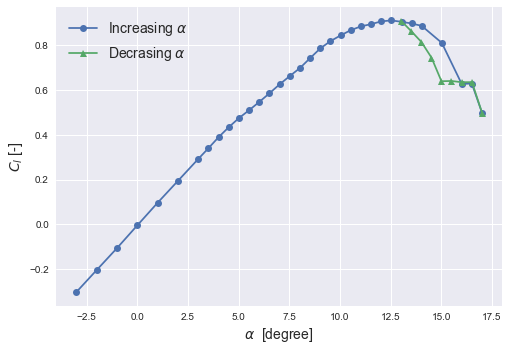

In [13]:
# plt.title('$C_l$ vs $α$')
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing $α$')
plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing $α$')
plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_l$ [-]")
plt.grid(True)
plt.savefig("clalphaCorrected.png",dpi=200 )
plt.show()

## Cd X alpha

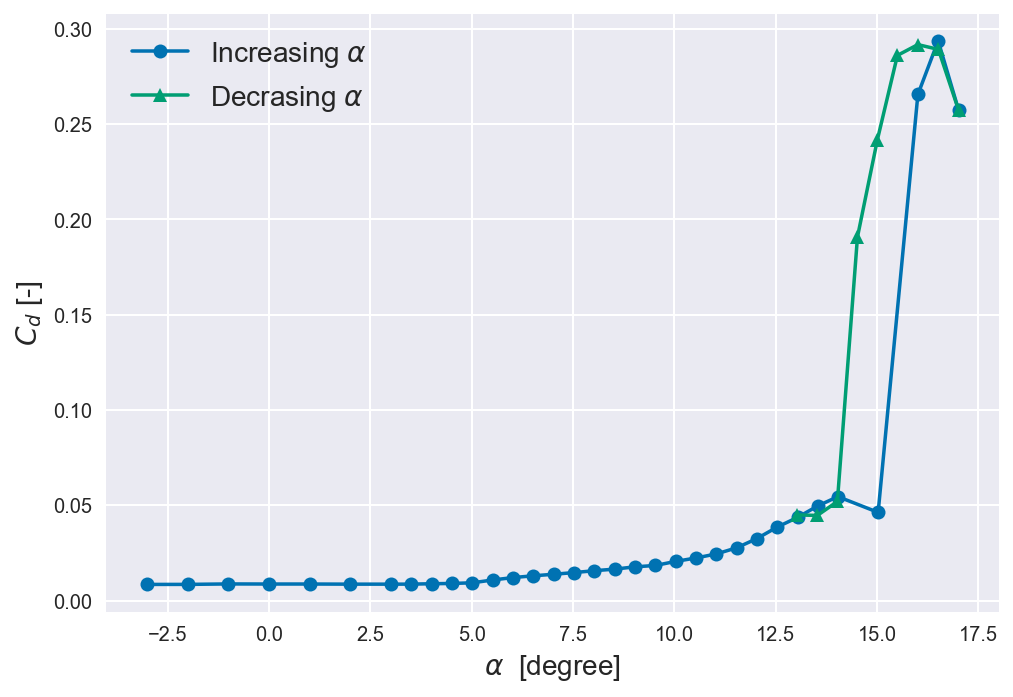

In [265]:
# plt.title('$C_d$ vs $α$')
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cd'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing $α$')
plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cd'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing $α$')
plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_d$ [-]")
plt.grid(True)
plt.savefig("cdalphaCorrected.png",dpi=200 )
plt.show()

## $C_d$ vs $C_l$ graphs

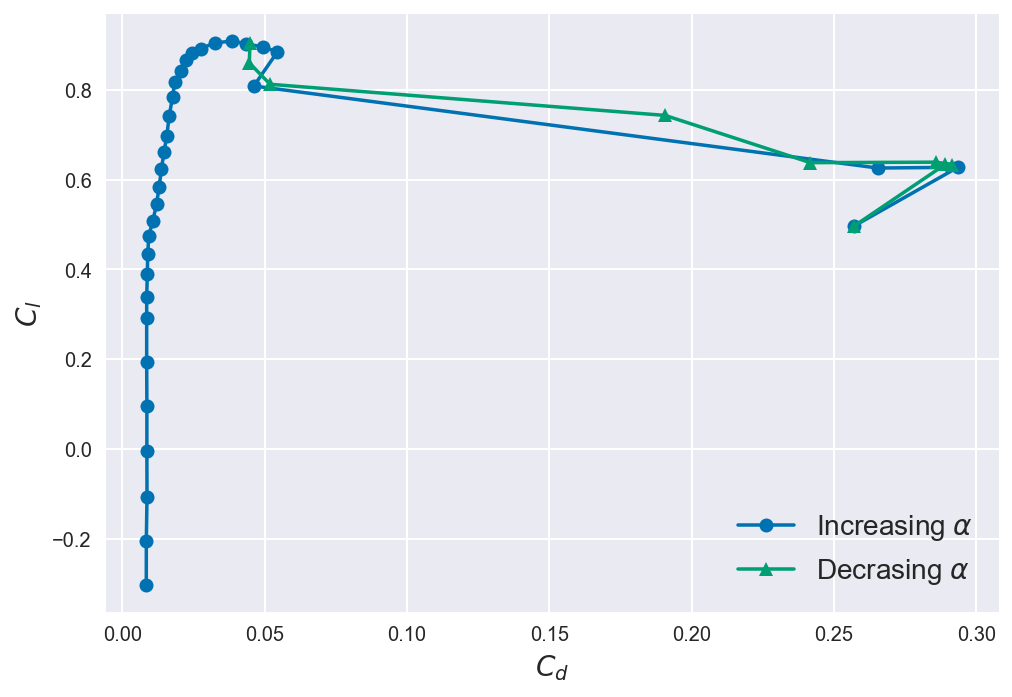

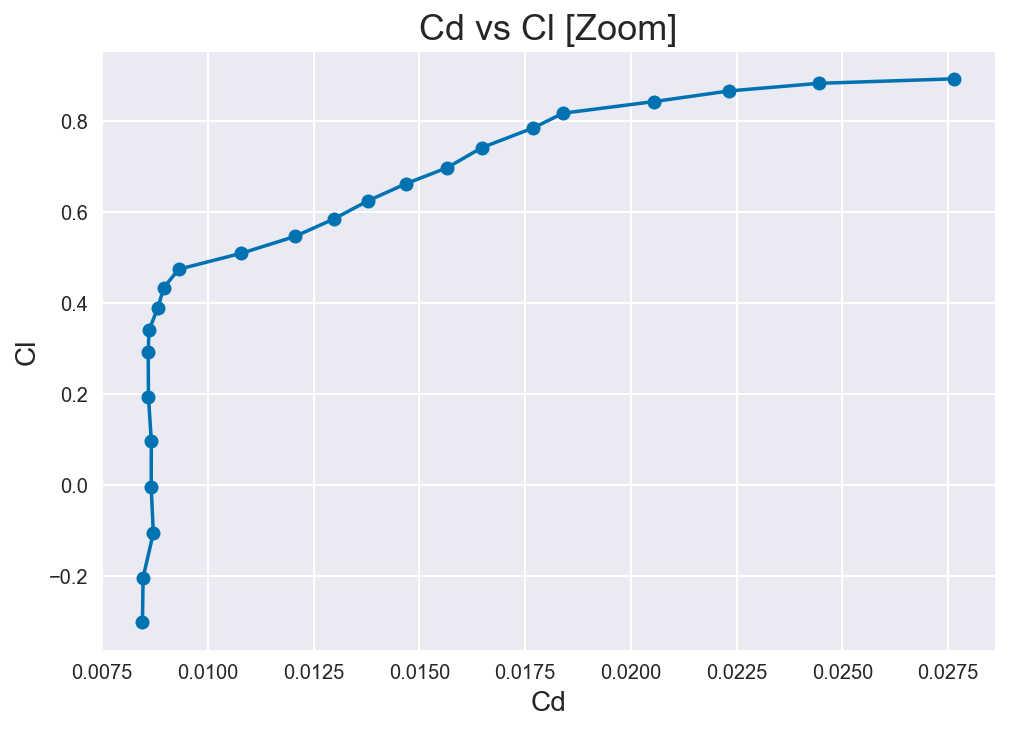

In [108]:

# plt.title('$C_d$ vs $C_l$')
plt.plot(data['Cd'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing $α$')
plt.plot(data['Cd'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing $α$')
plt.xlabel("$C_d$")
plt.ylabel("$C_l$")
plt.legend(loc=4)
plt.grid(True)
plt.savefig("clcdaCorrected.png",dpi=200 )
plt.show()

plt.title('Cd vs Cl [Zoom]')
plt.plot(data['Cd'][1:25].to_numpy(dtype='float'),data['Cl'][1:25].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()

## Cm vs Alpha

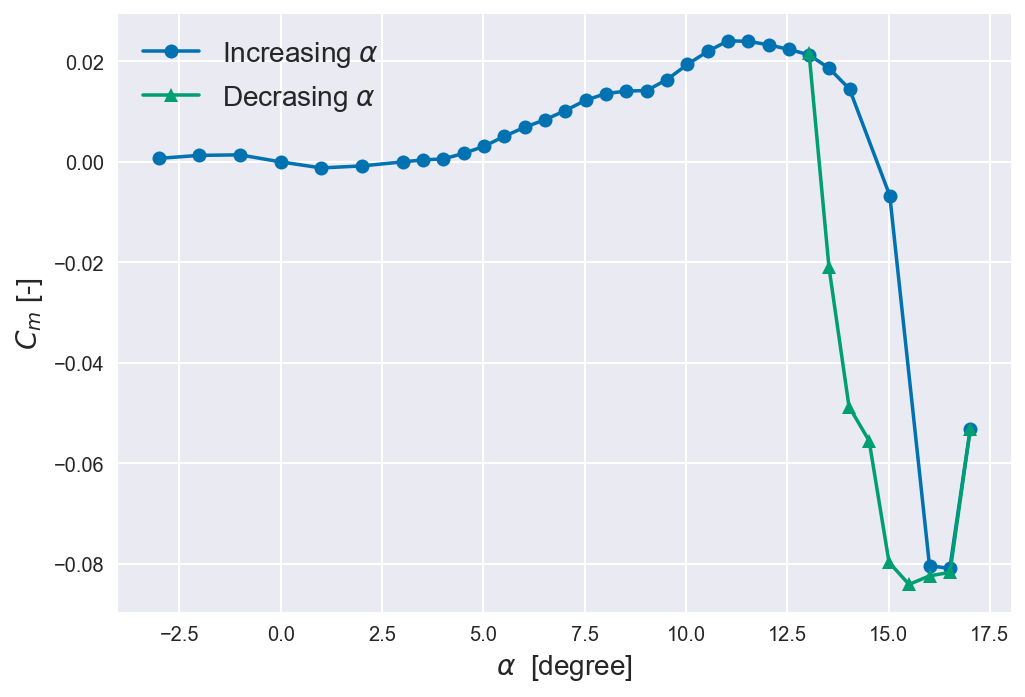

In [109]:

plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cm'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing $α$')
plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cm'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing $α$')
plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_m$ [-]")
plt.grid(True)
plt.savefig("cmalphaCorrected.png",dpi=200 )
plt.show()

## Pressure distribution

In [182]:
data["Alpha"]



0     degrees
1      -3.012
2      -2.008
3      -1.004
4      -0.000
5       1.004
6       2.008
7       3.012
8       3.514
9       4.016
10      4.518
11      5.019
12      5.521
13      6.023
14      6.525
15      7.022
16      7.533
17      8.030
18      8.532
19      9.034
20      9.535
21     10.037
22     10.538
23     11.039
24     11.539
25     12.040
26     12.540
27     13.045
28     13.539
29     14.038
30     15.031
31     16.012
32     16.512
33     17.017
34     16.518
35     16.012
36     15.507
37     15.013
38     14.521
39     14.025
40     13.531
41     13.040
Name: Alpha, dtype: object

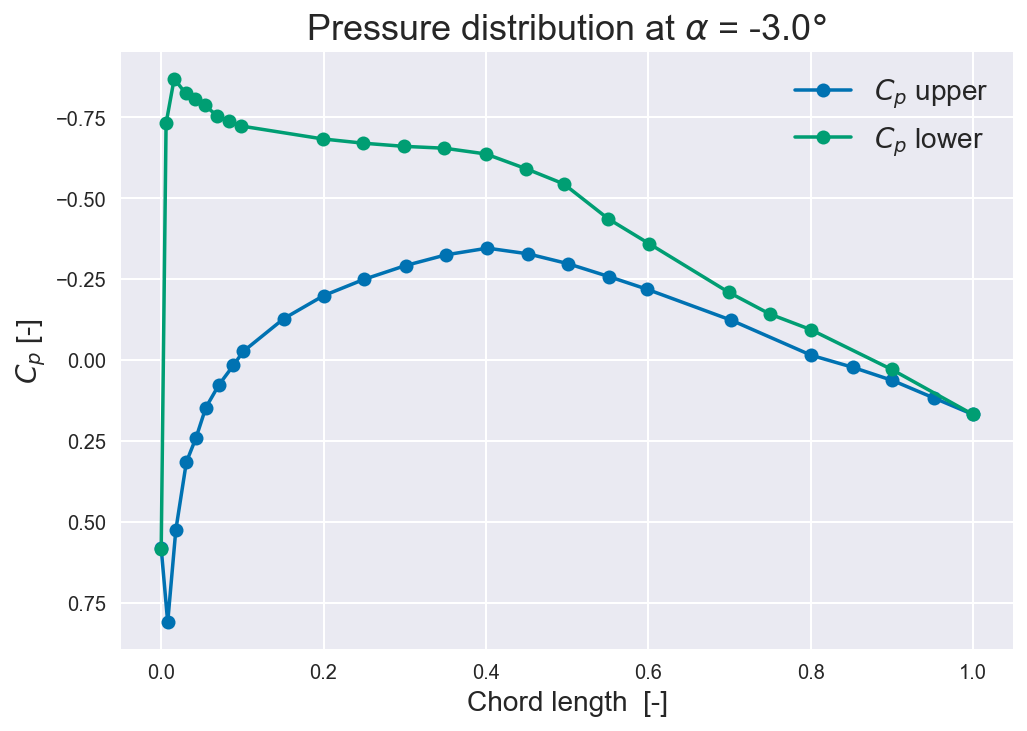

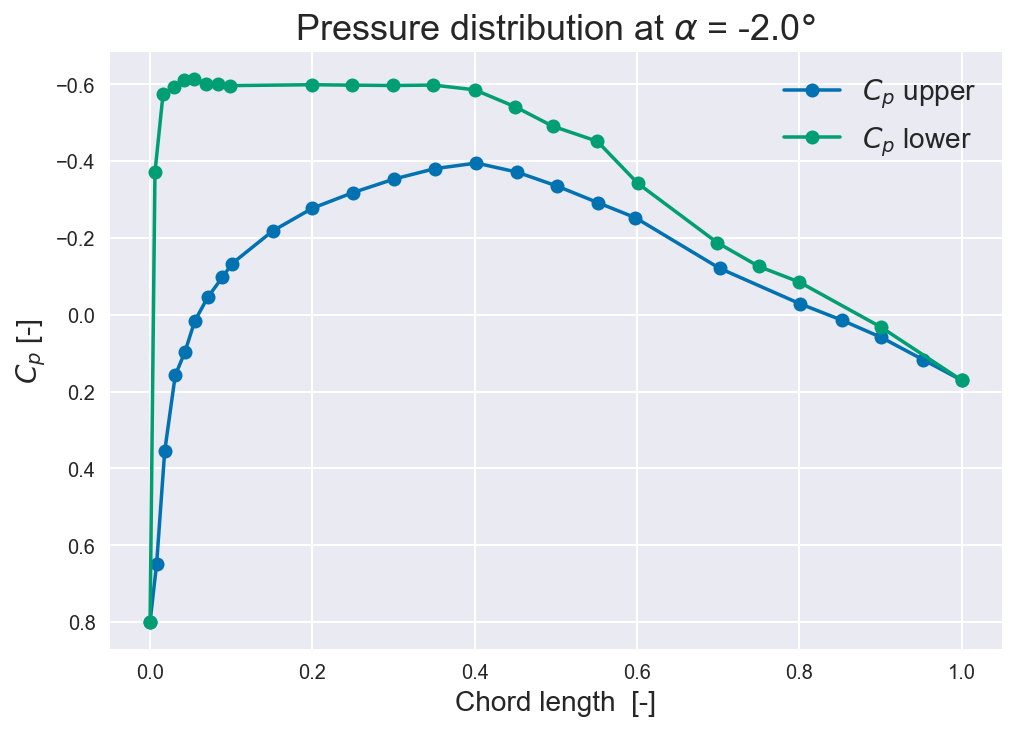

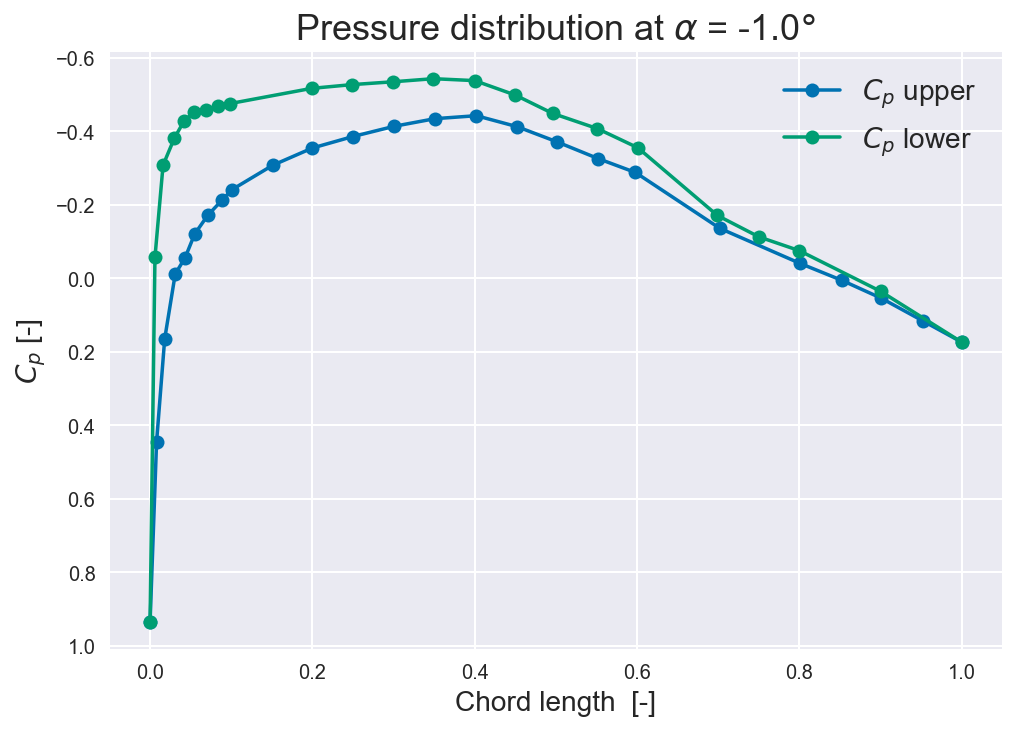

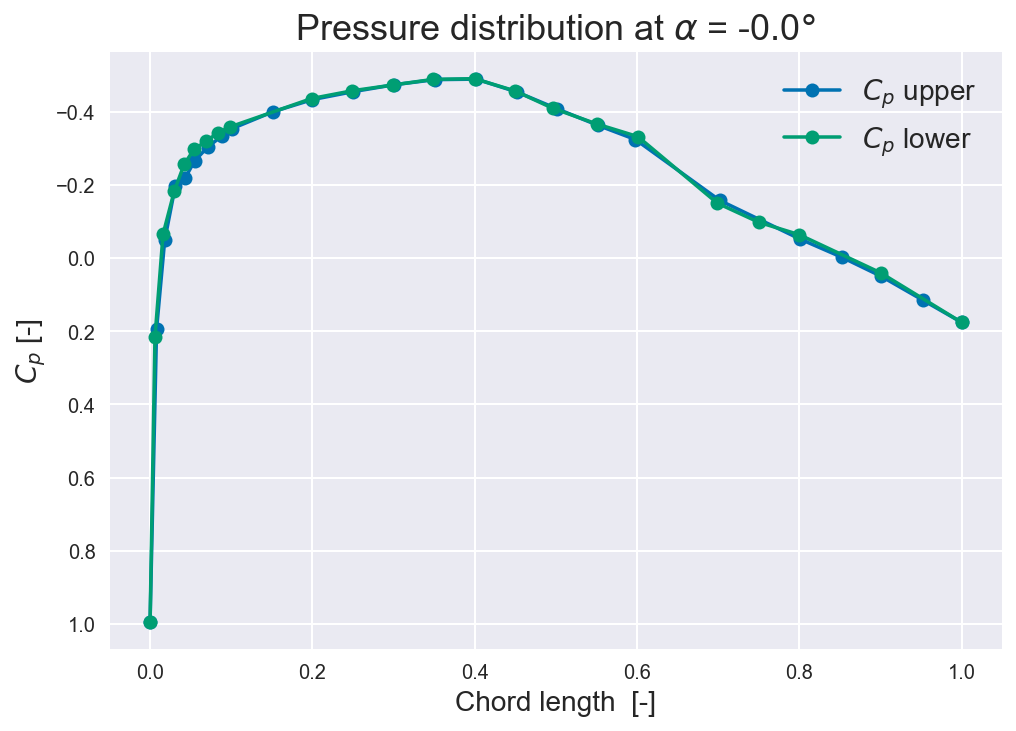

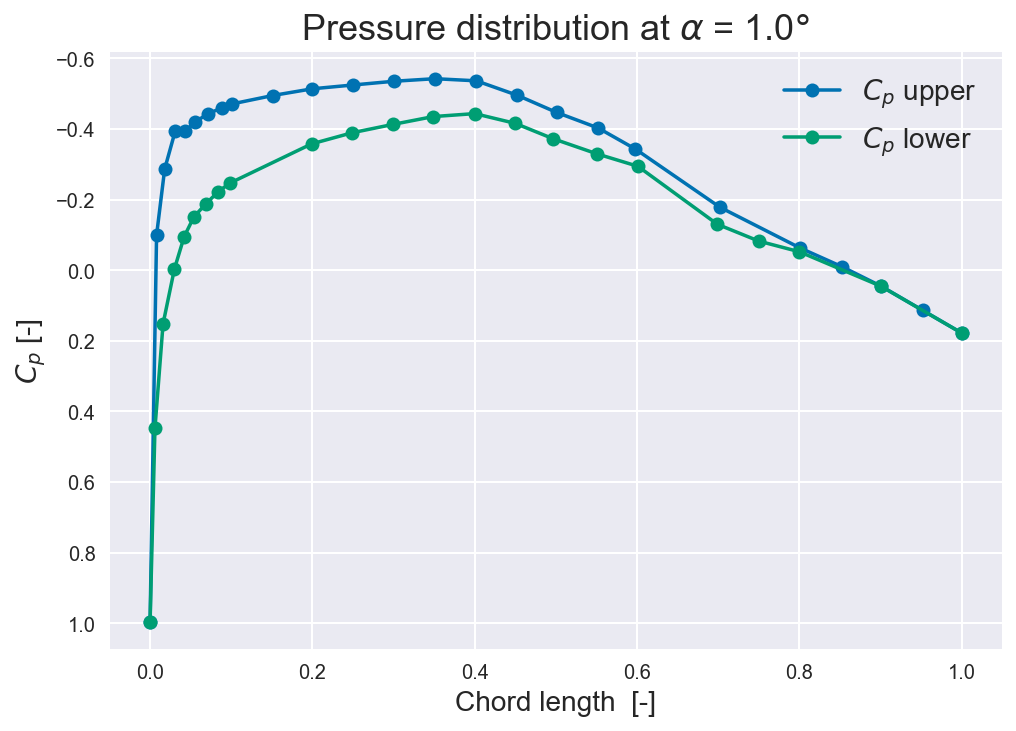

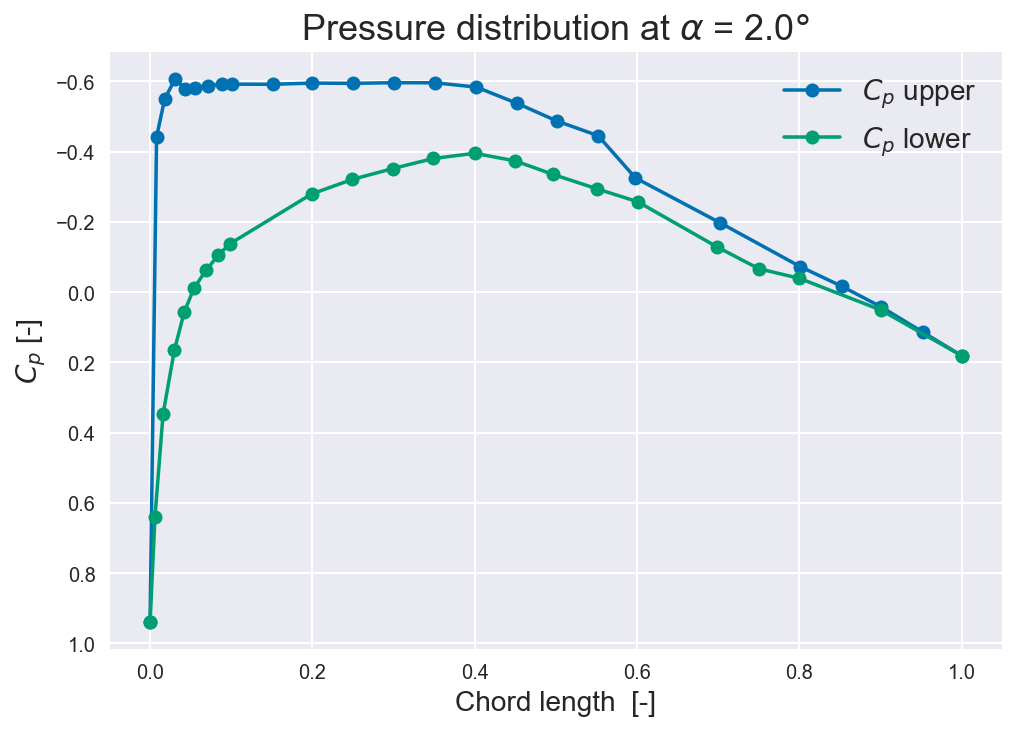

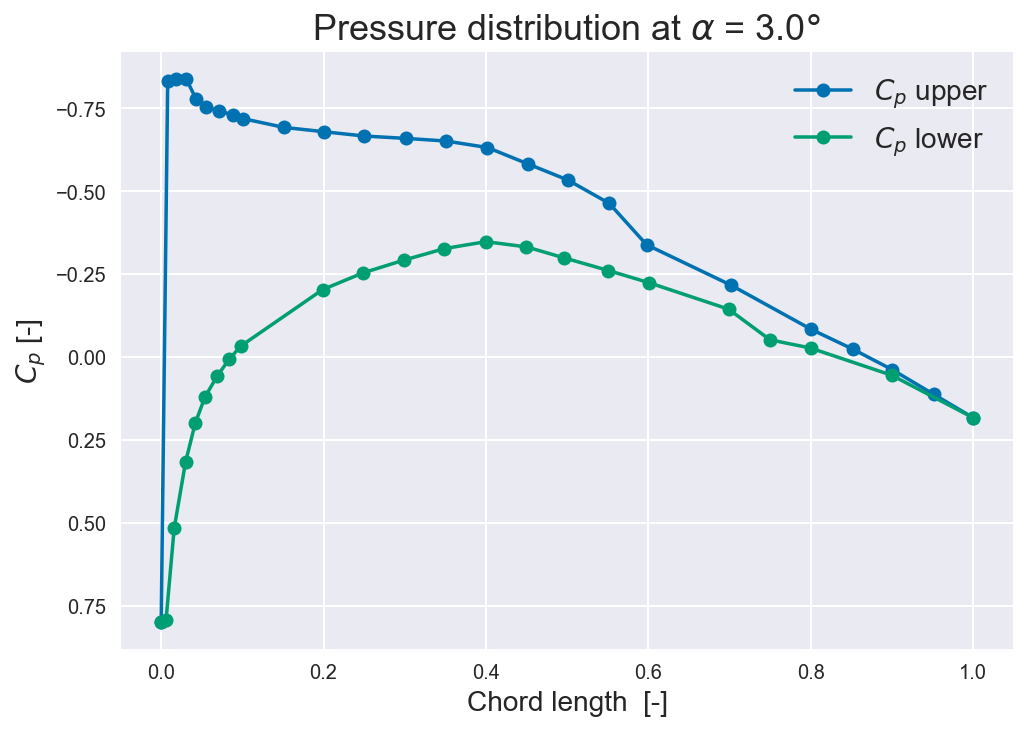

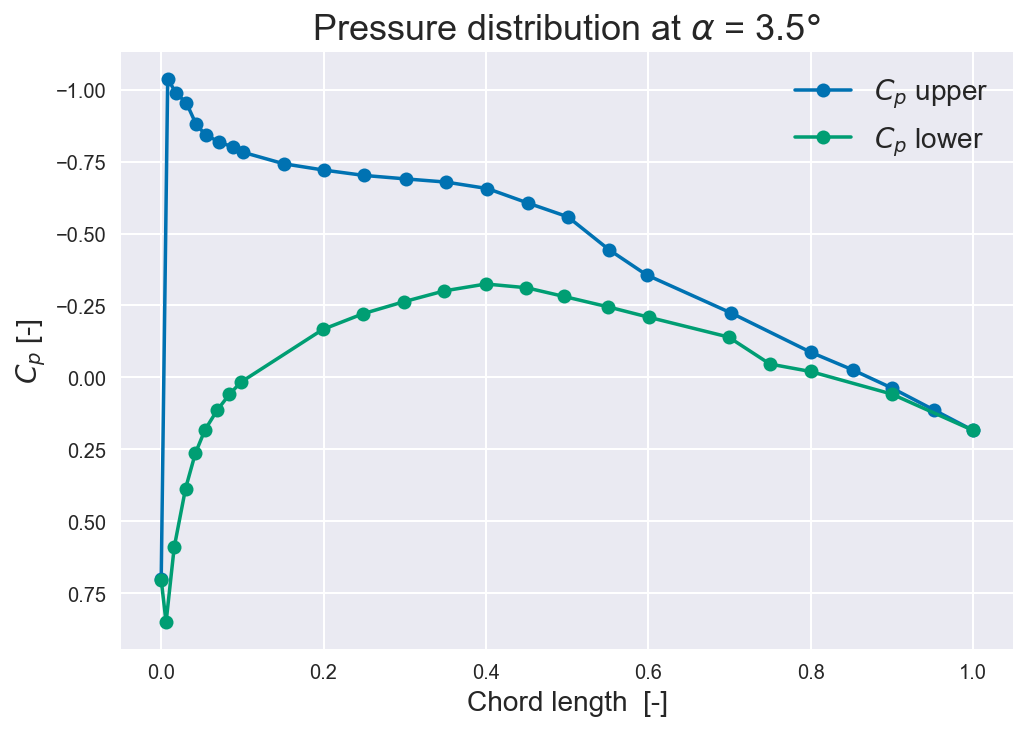

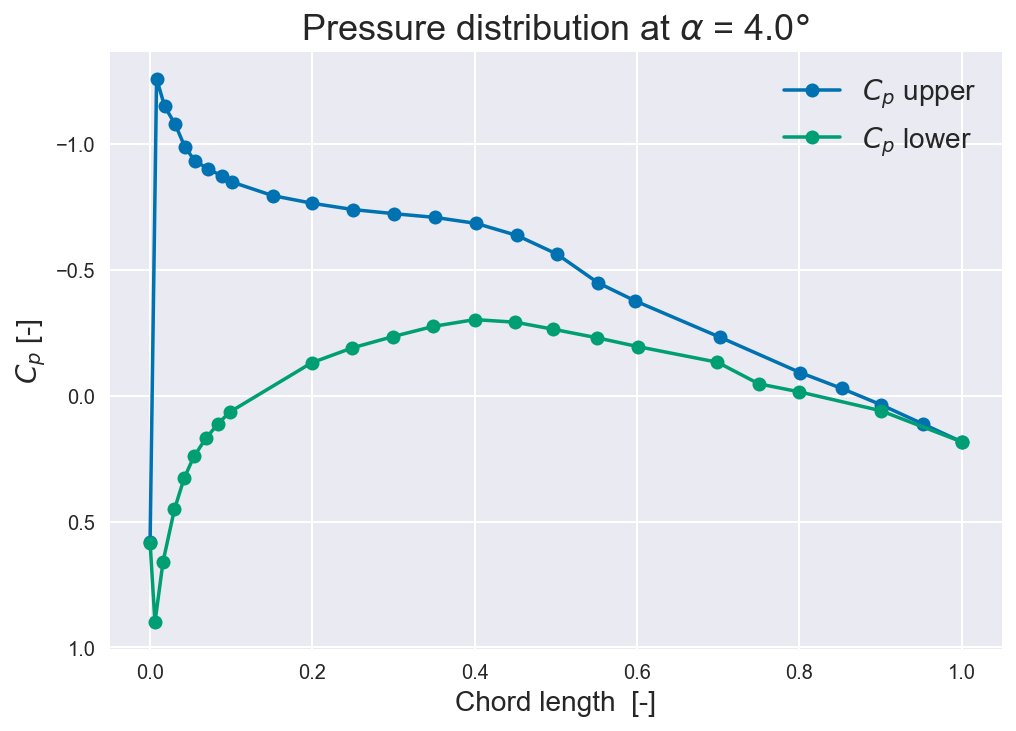

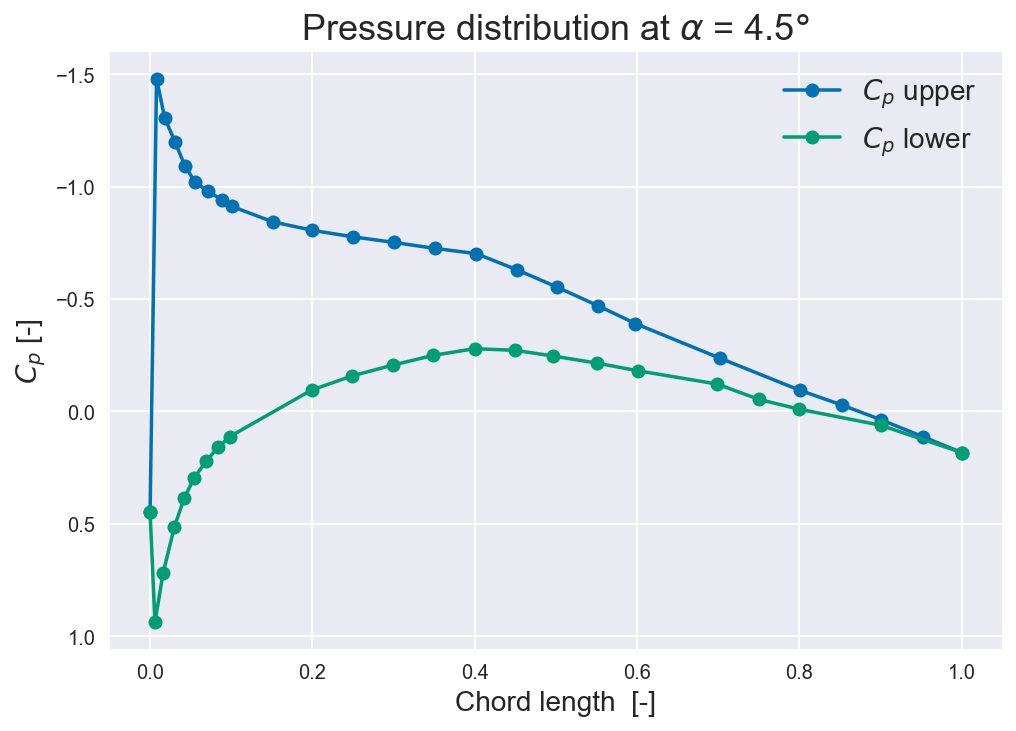

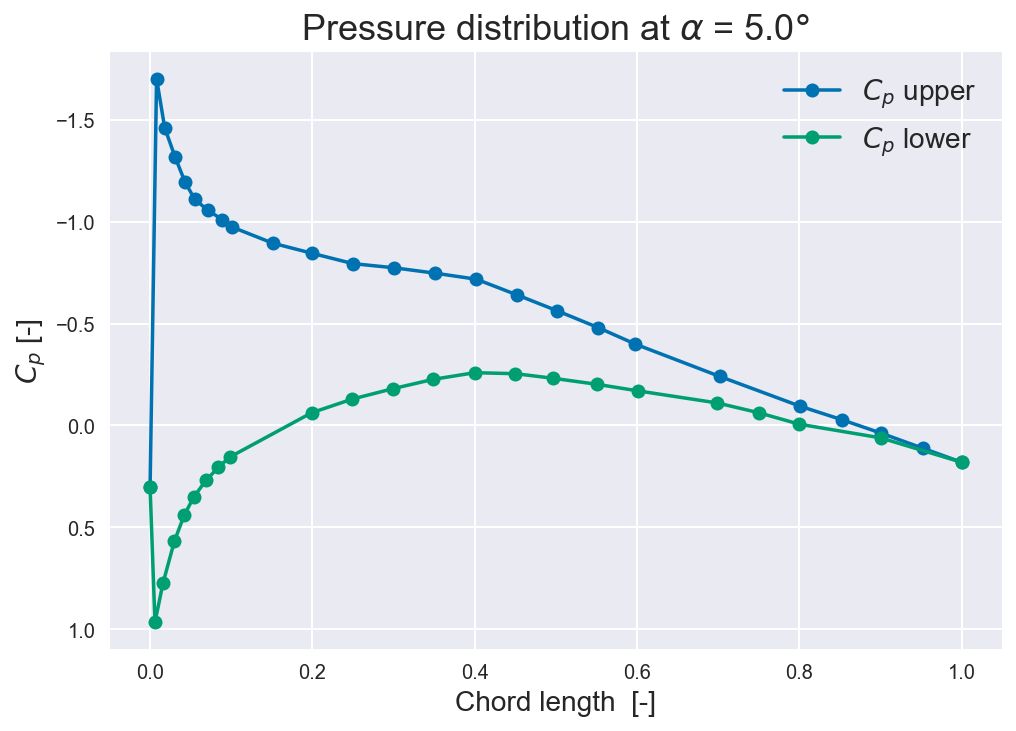

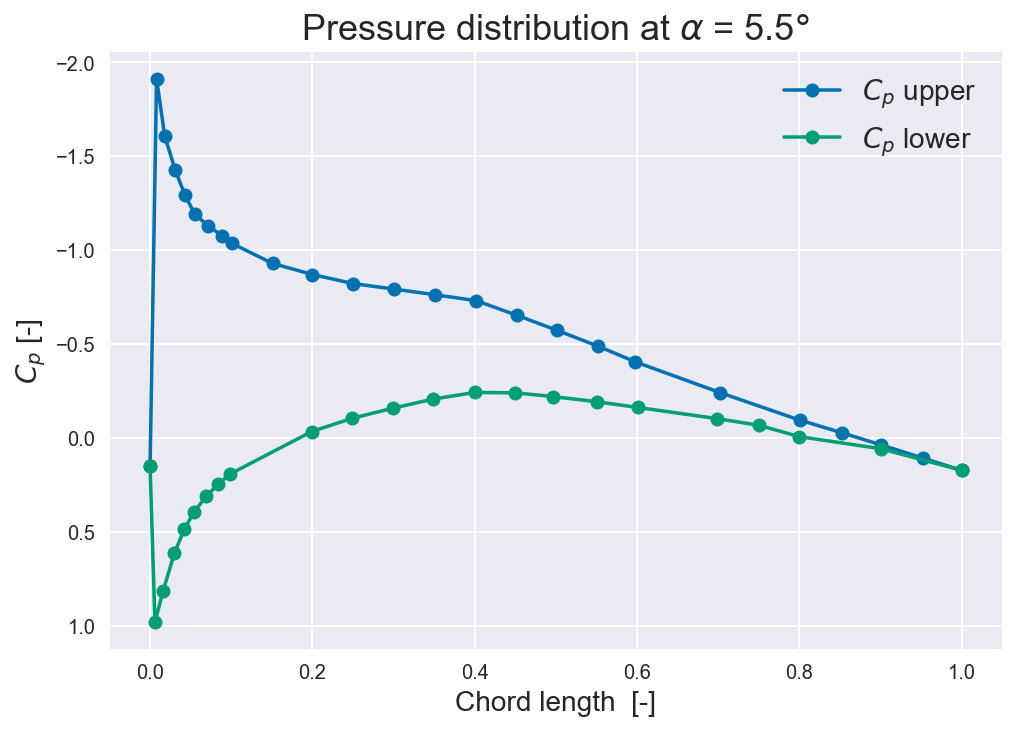

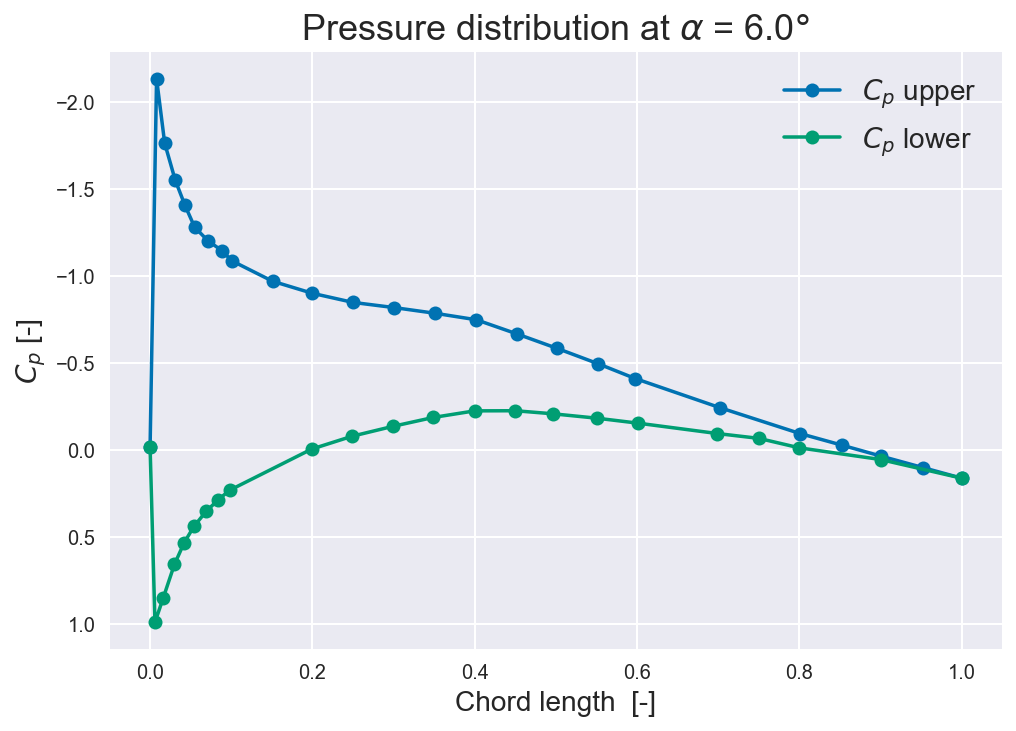

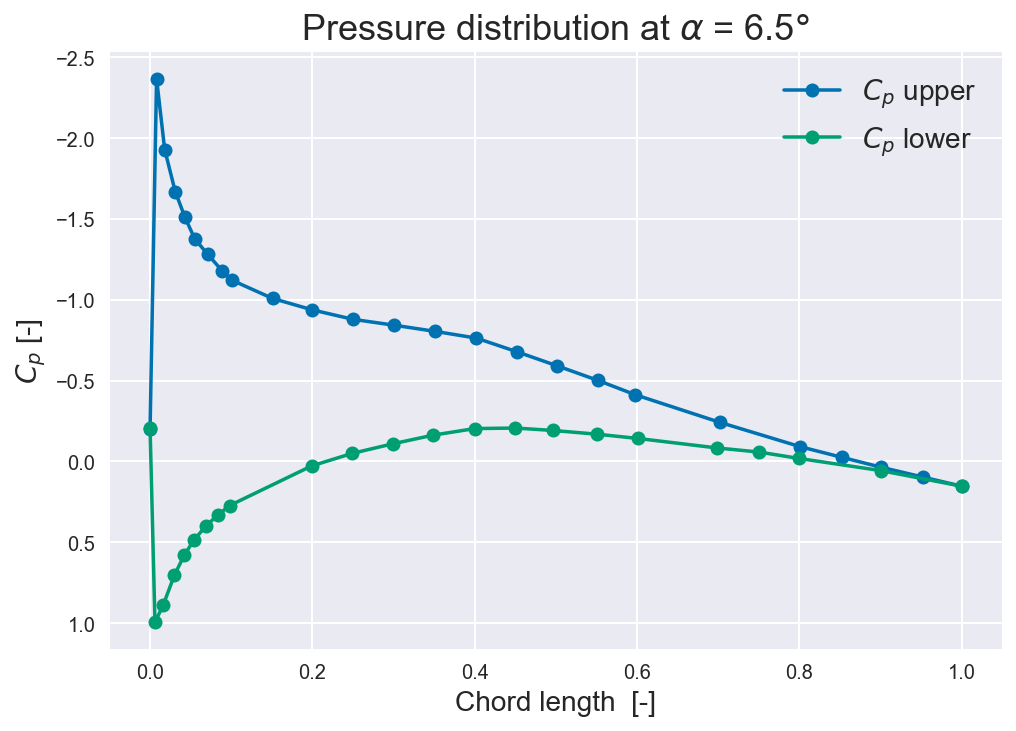

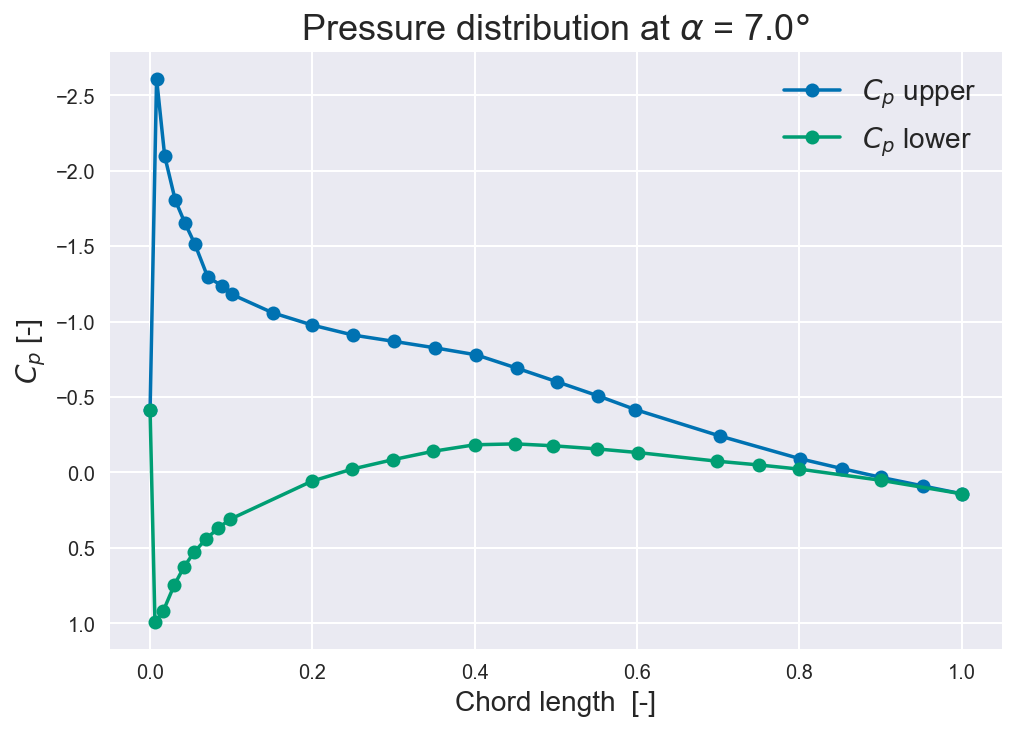

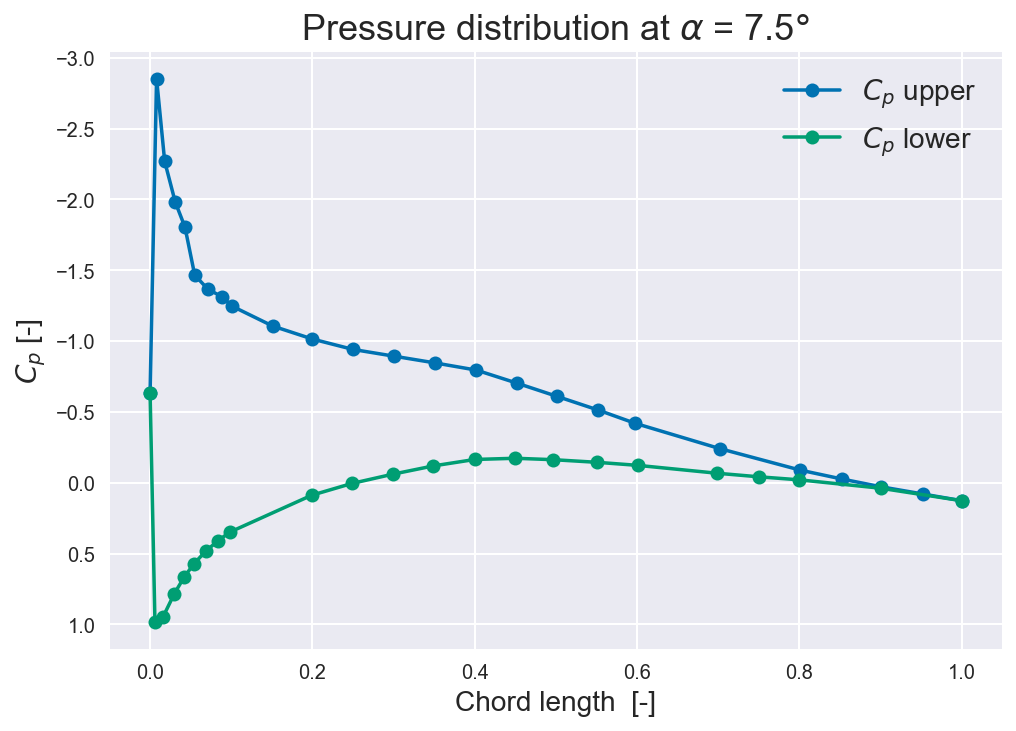

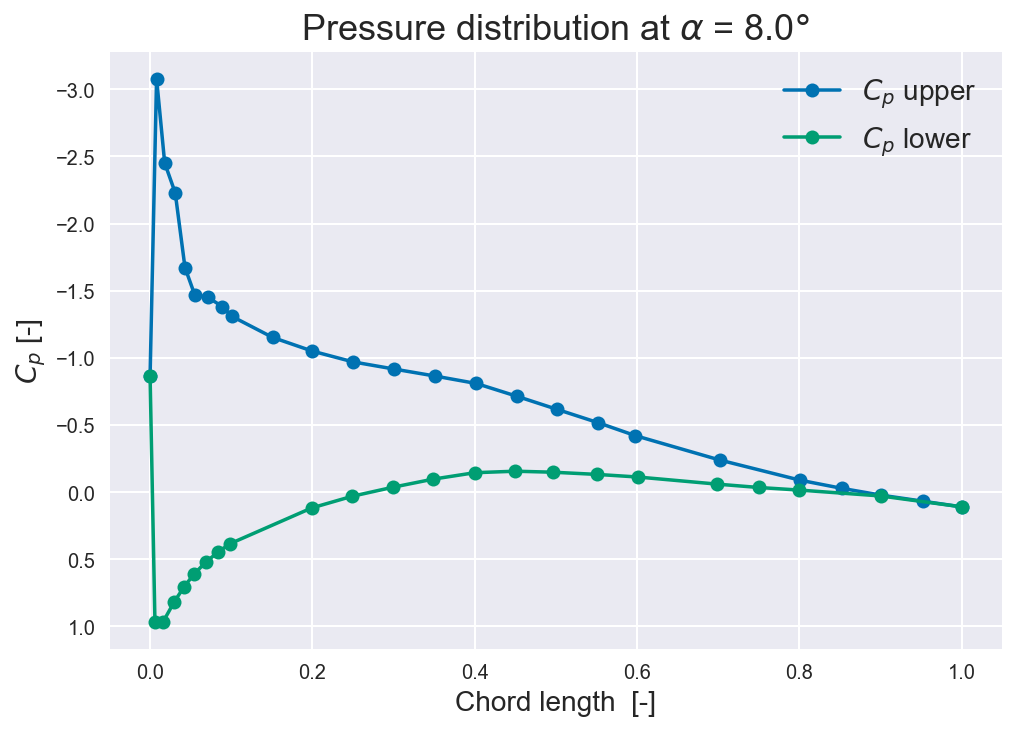

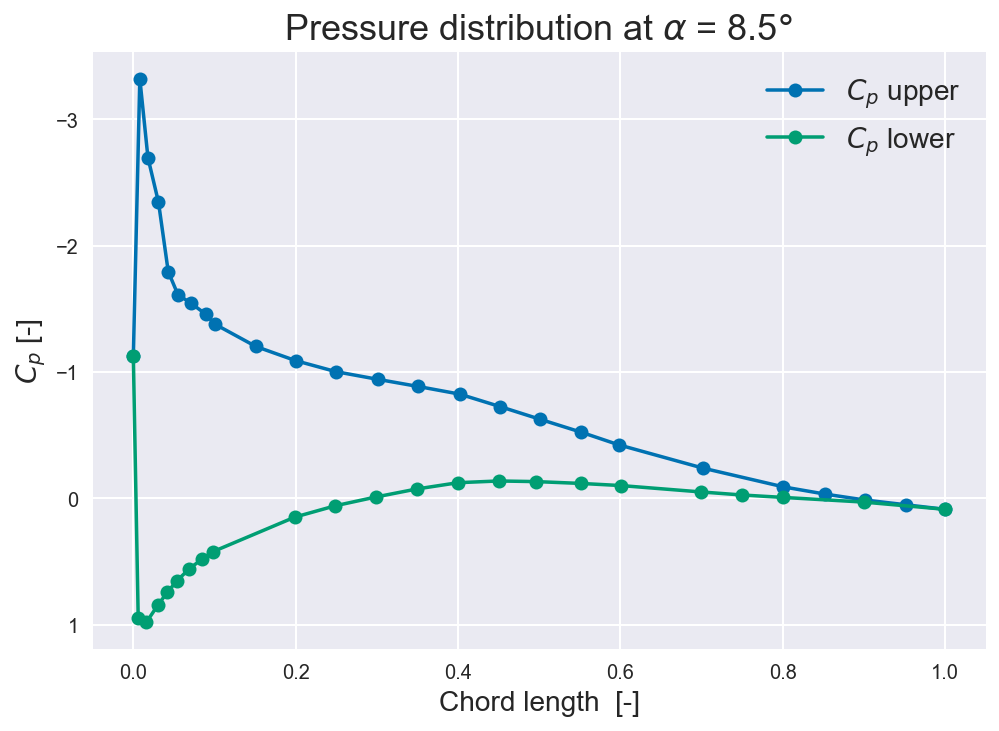

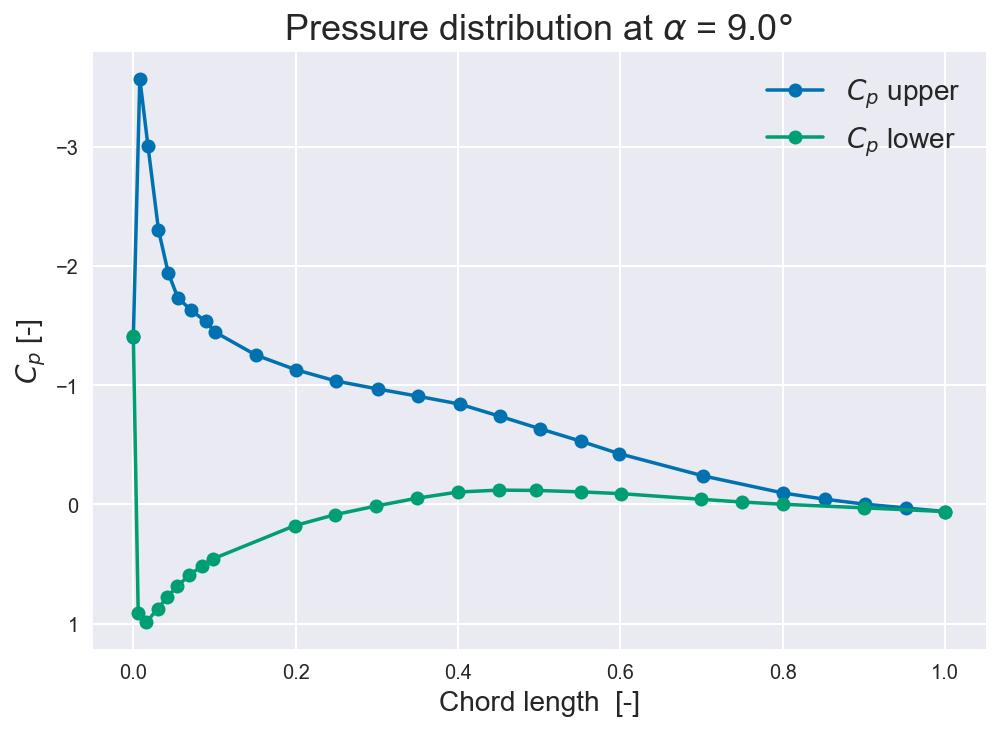

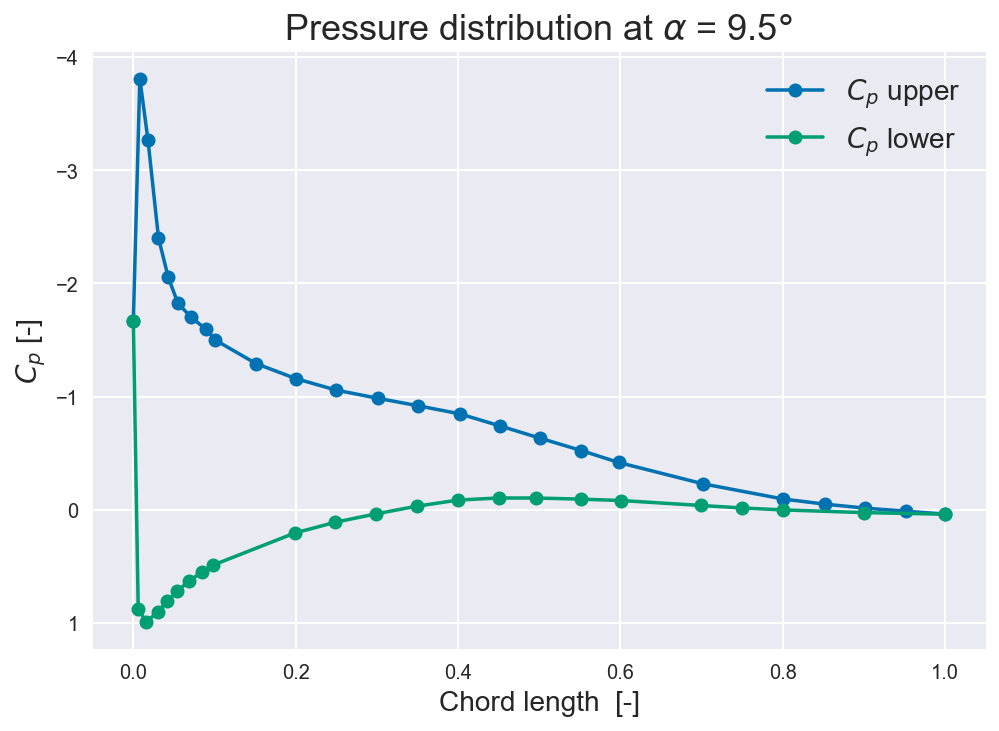

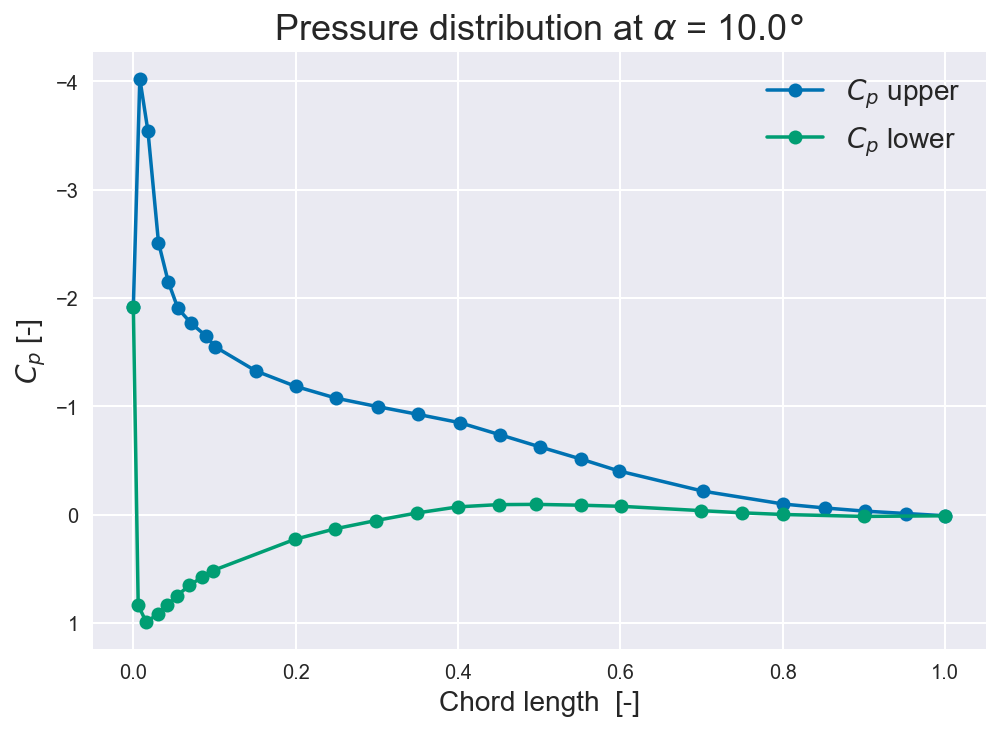

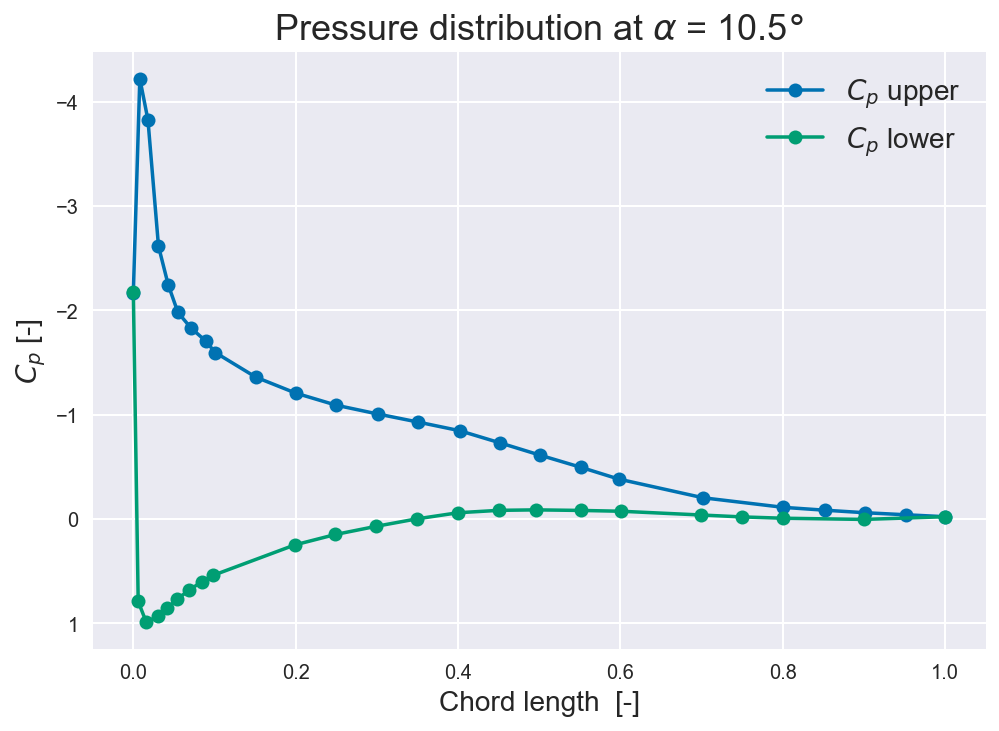

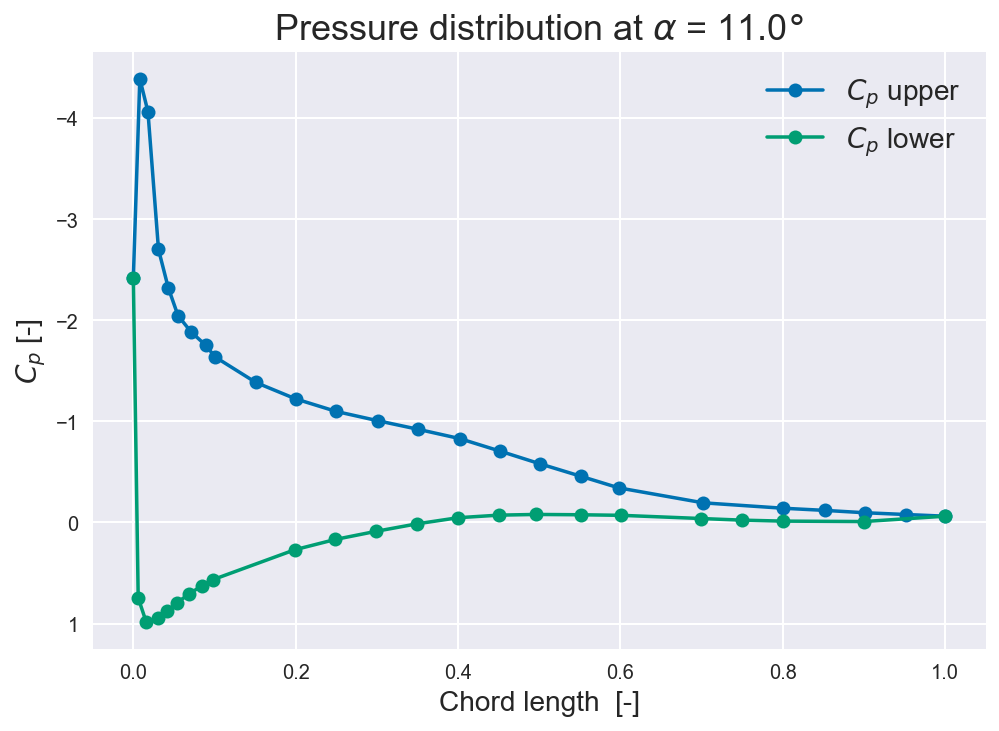

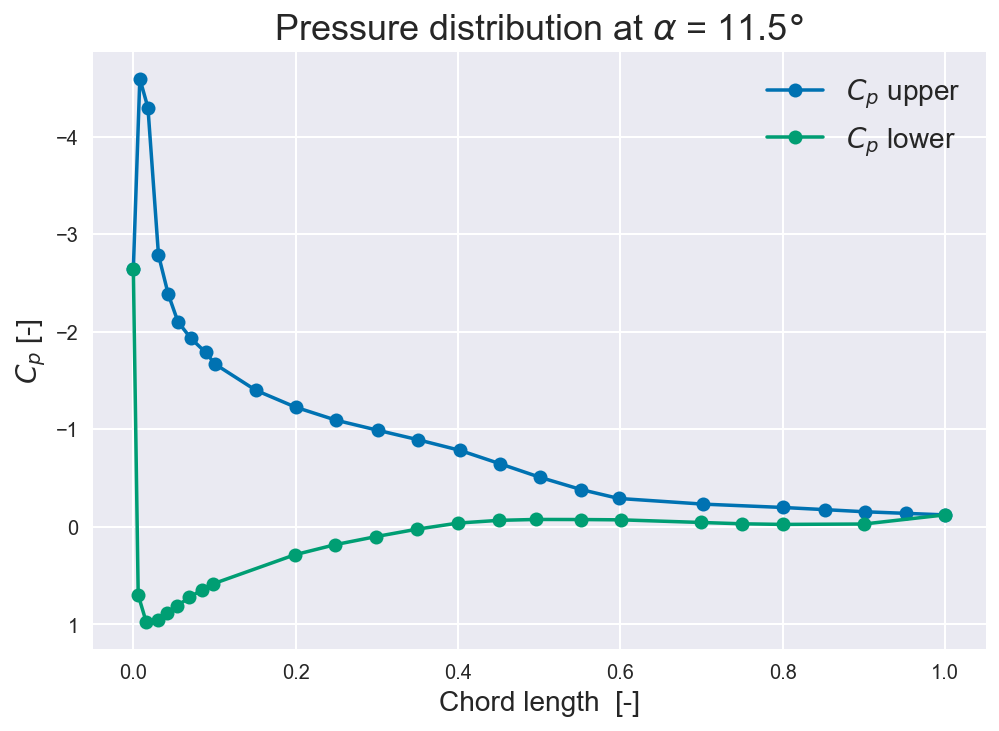

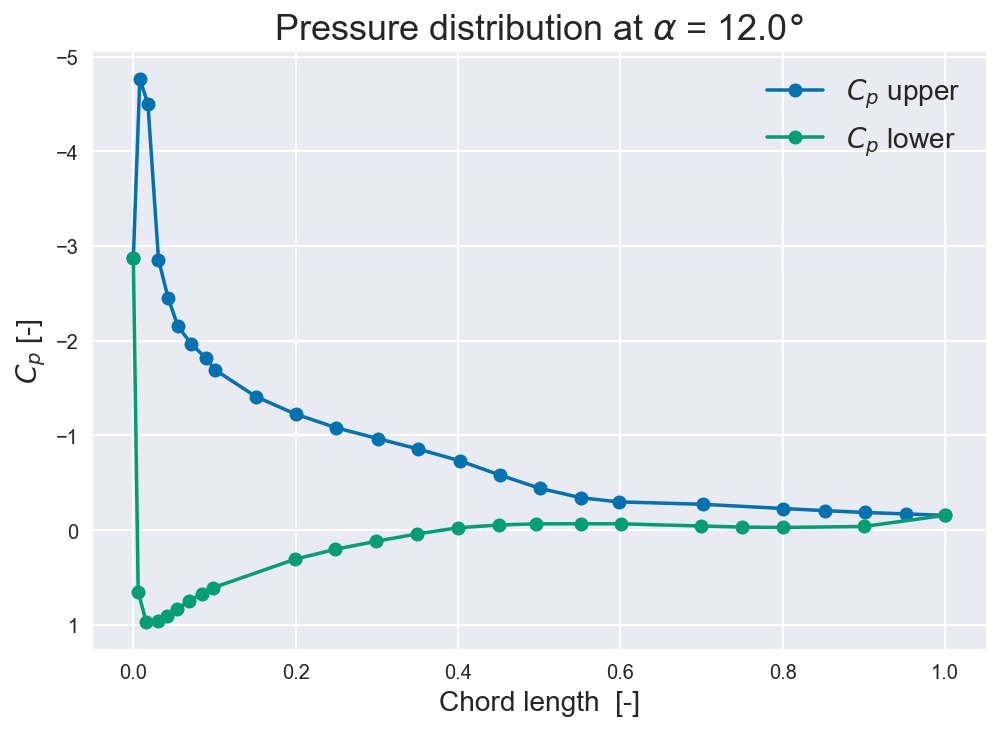

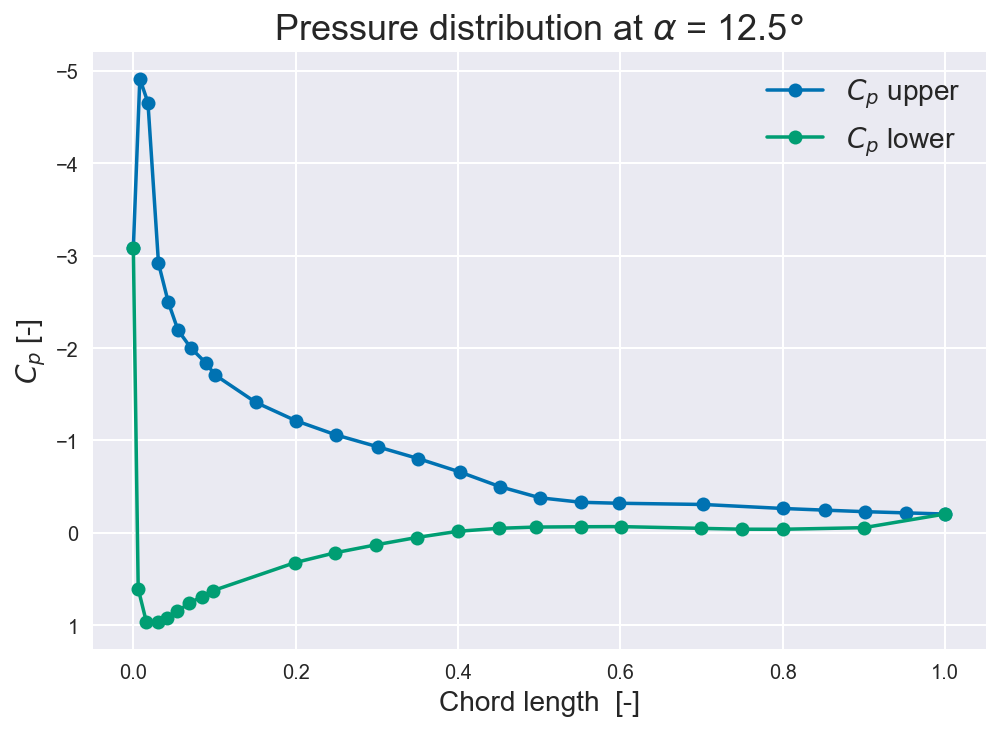

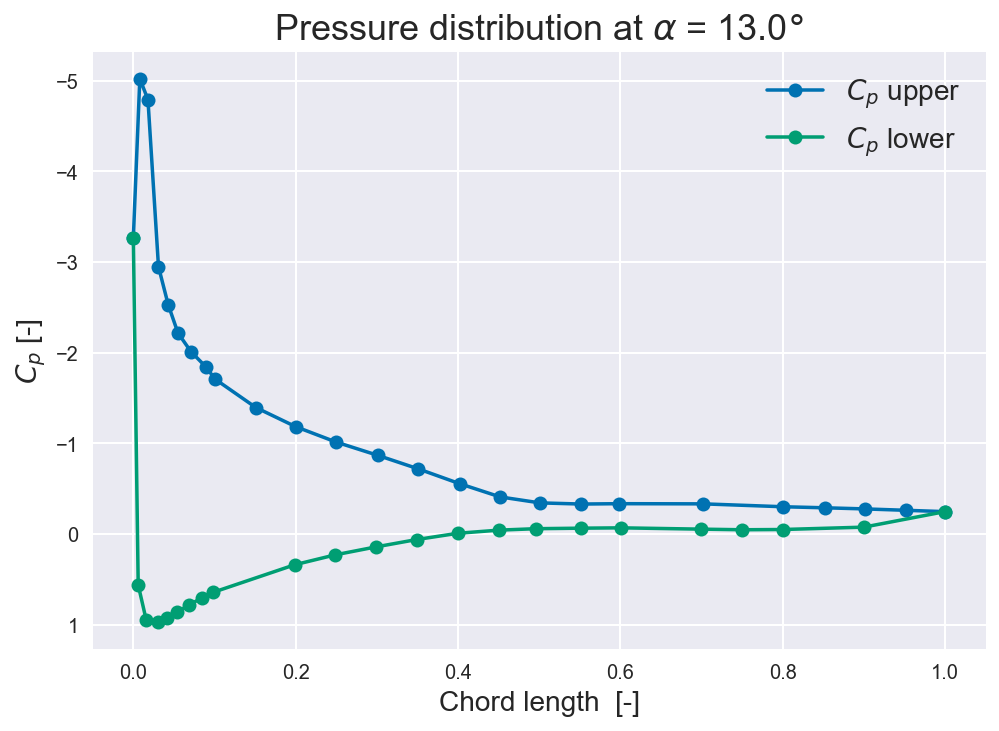

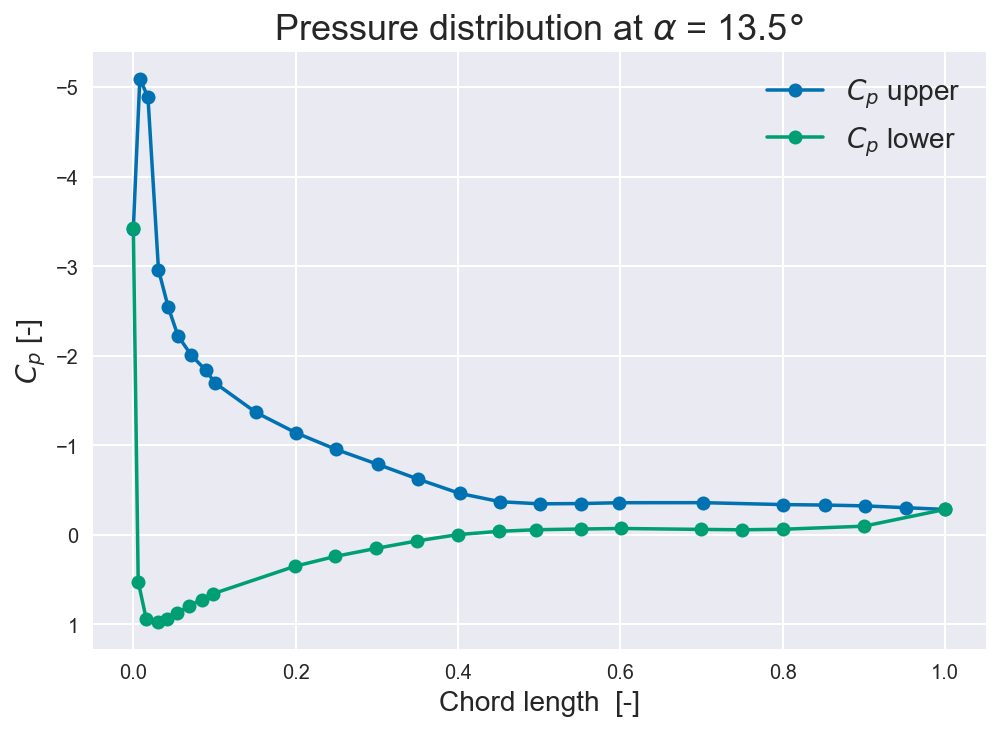

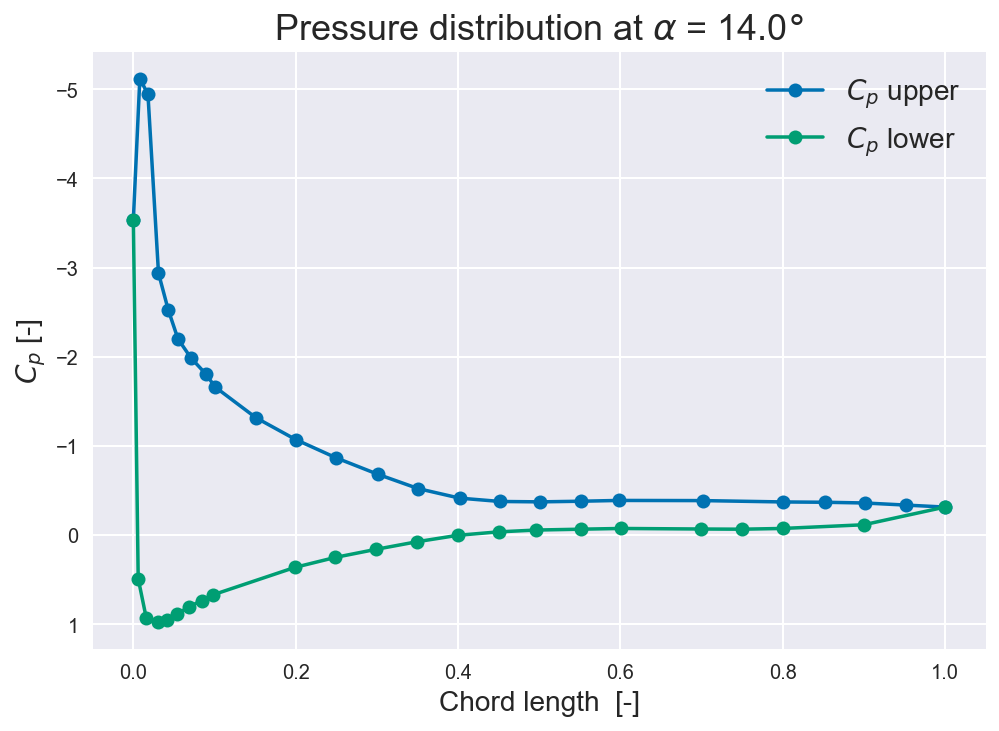

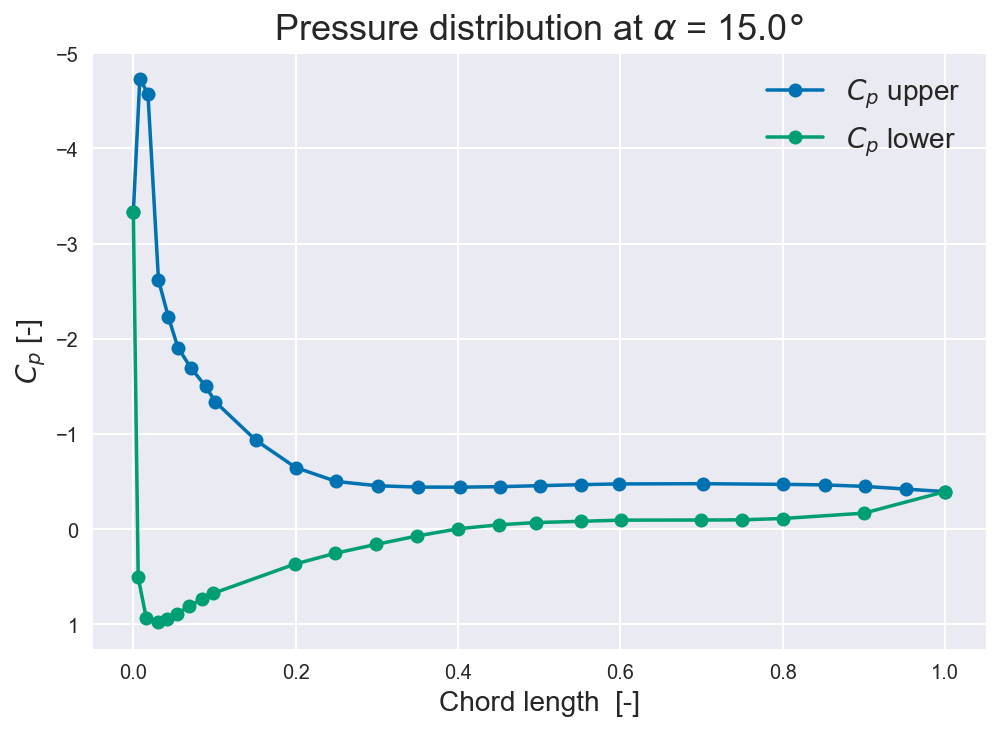

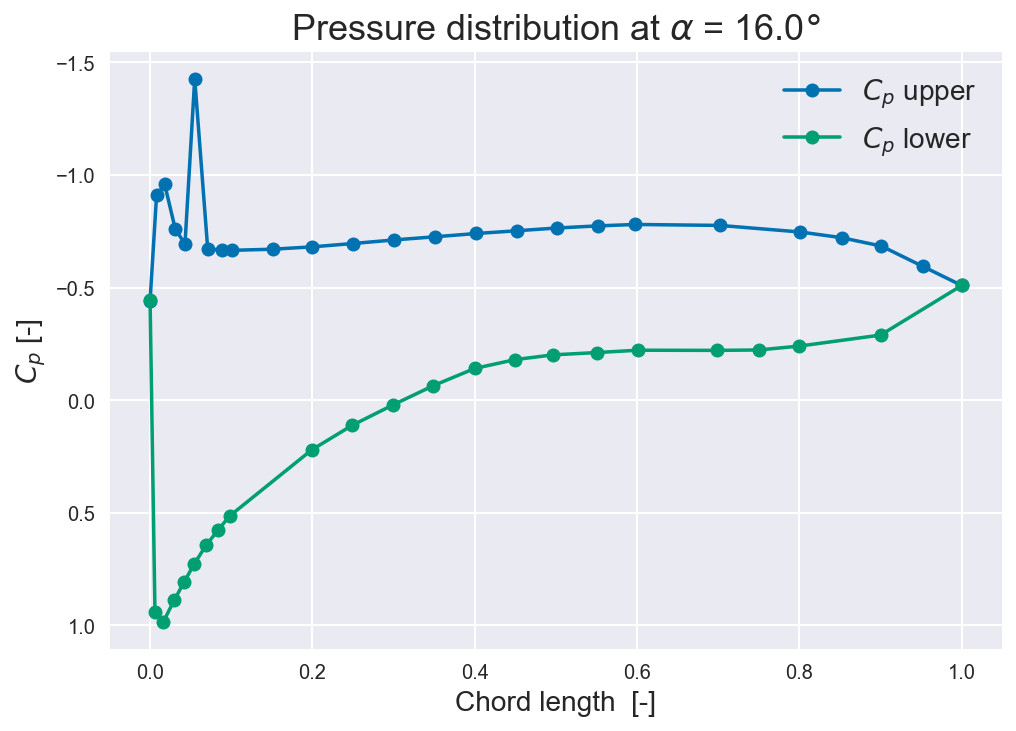

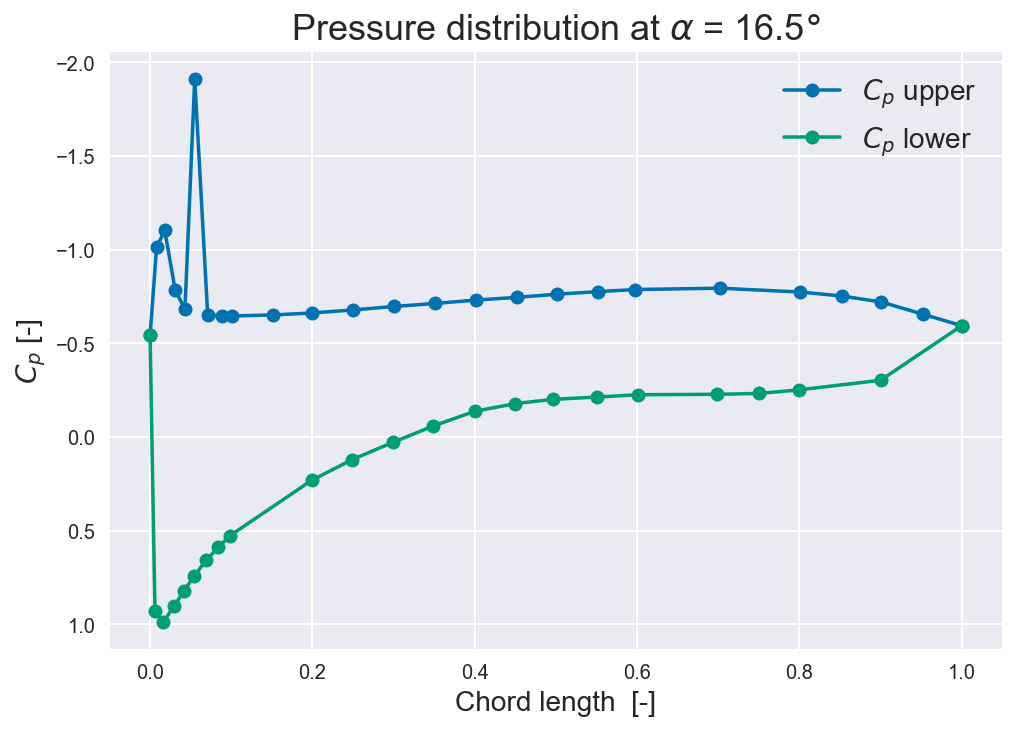

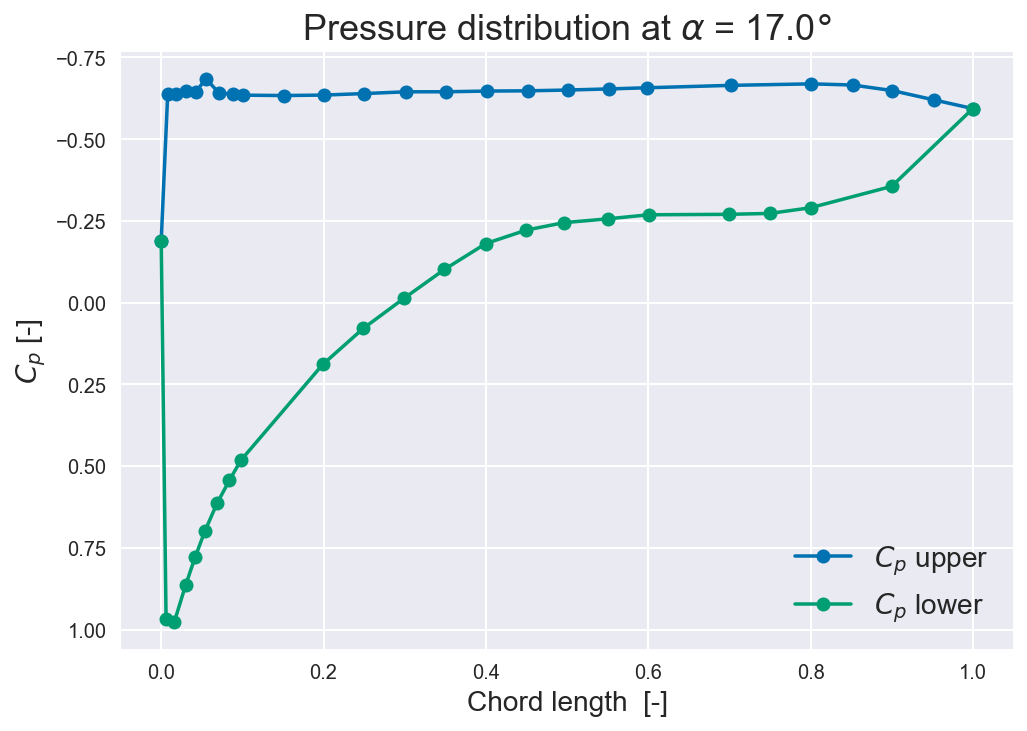

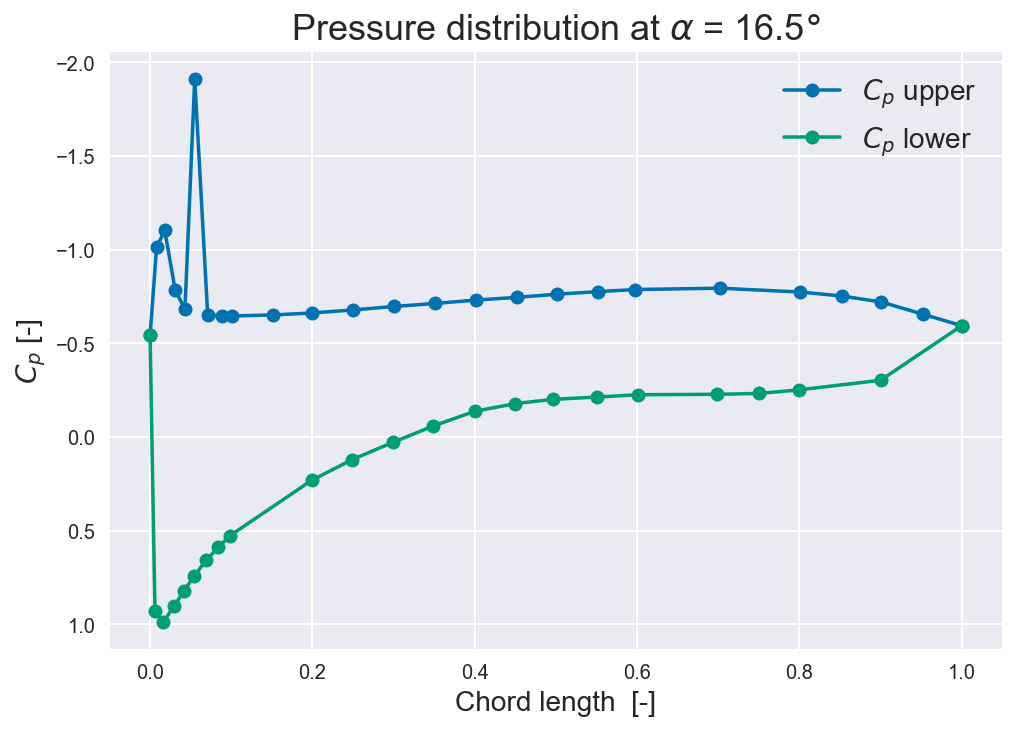

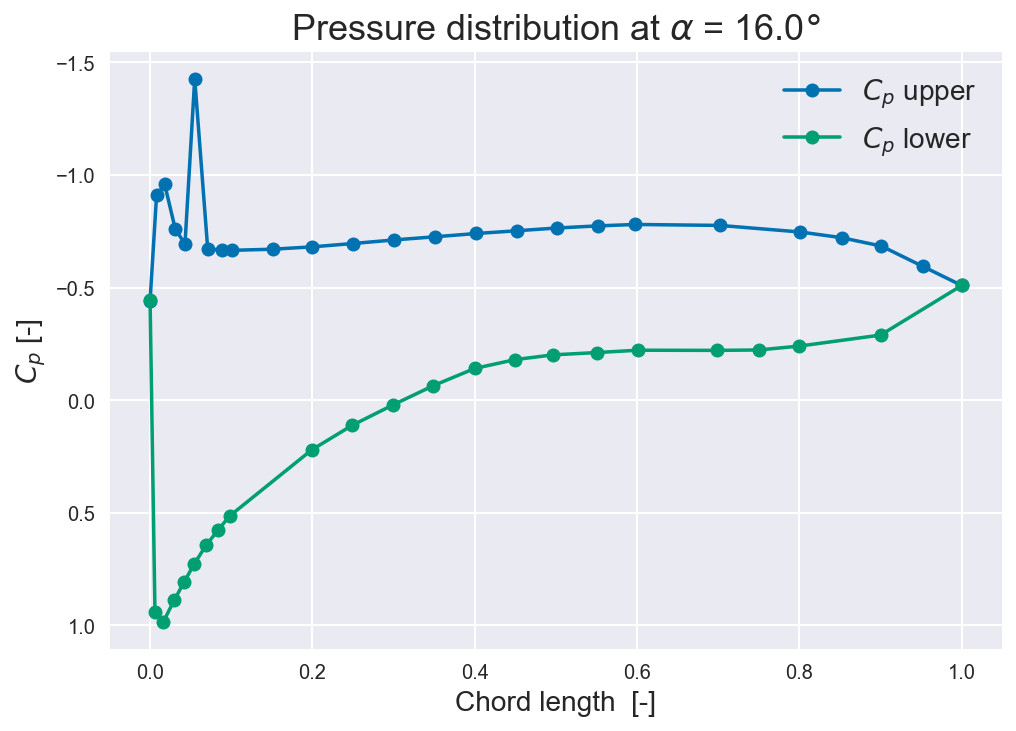

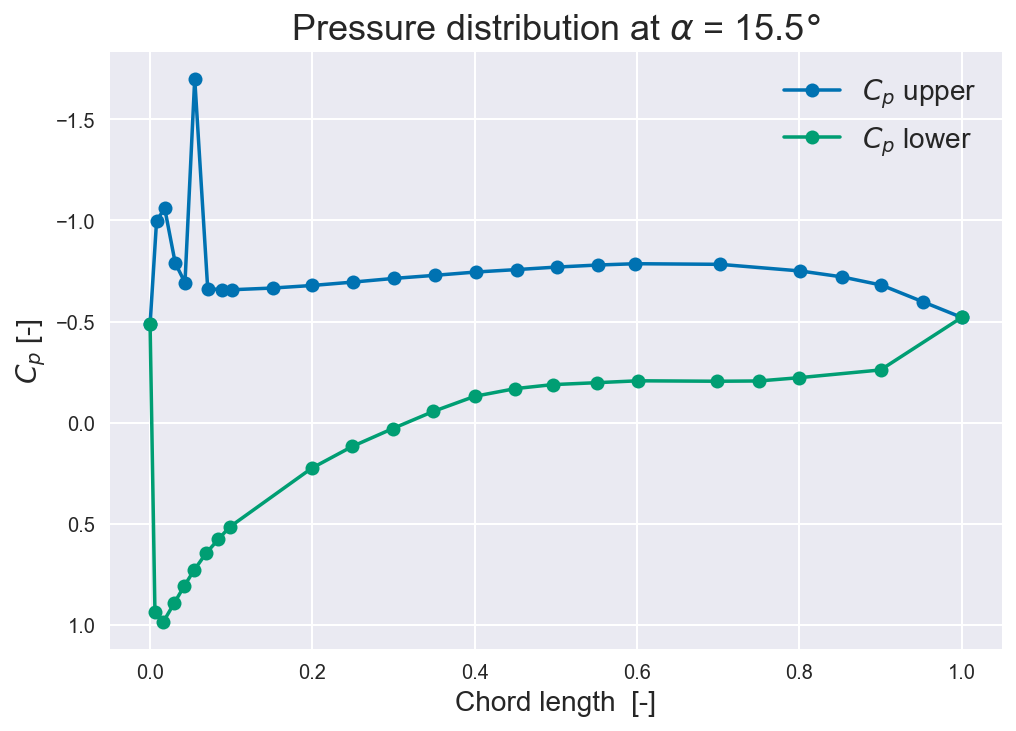

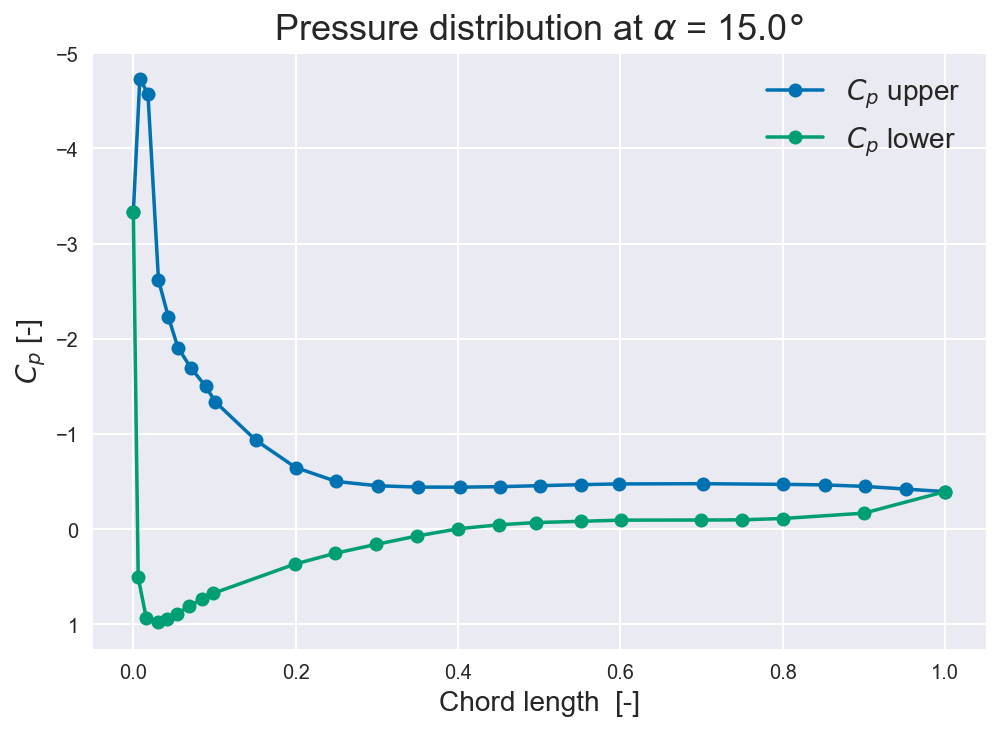

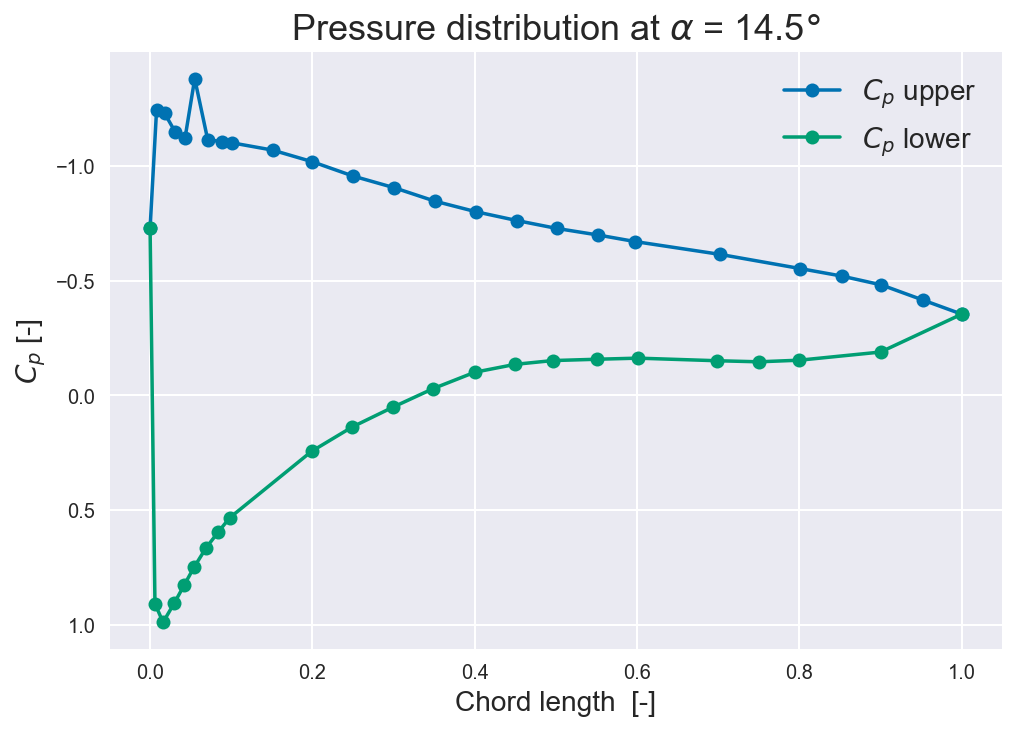

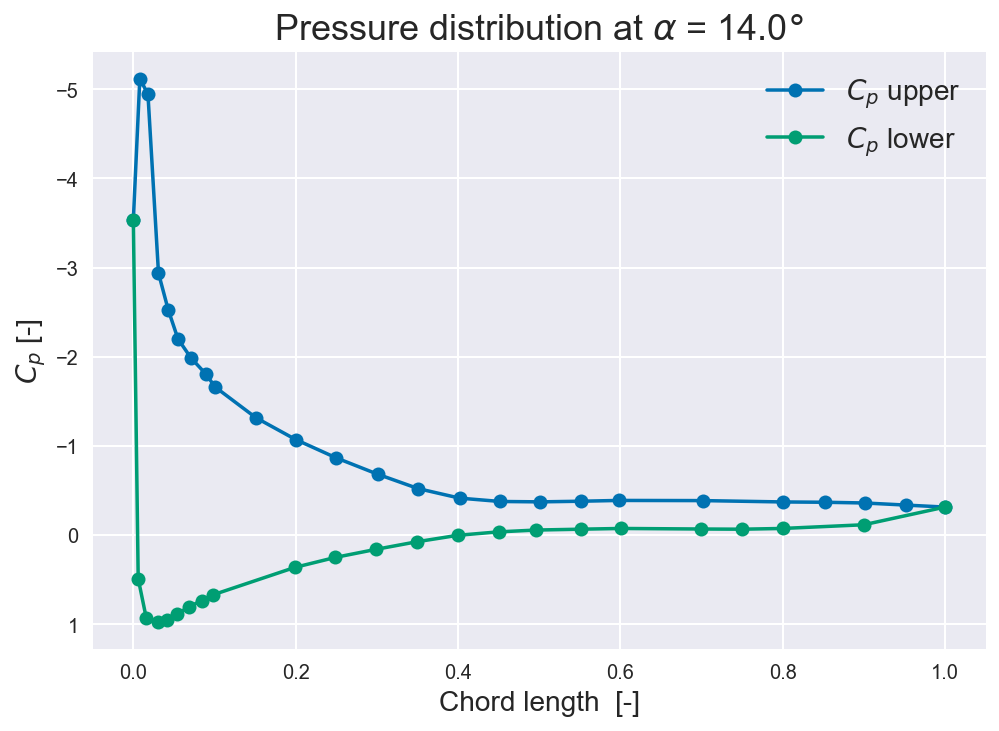

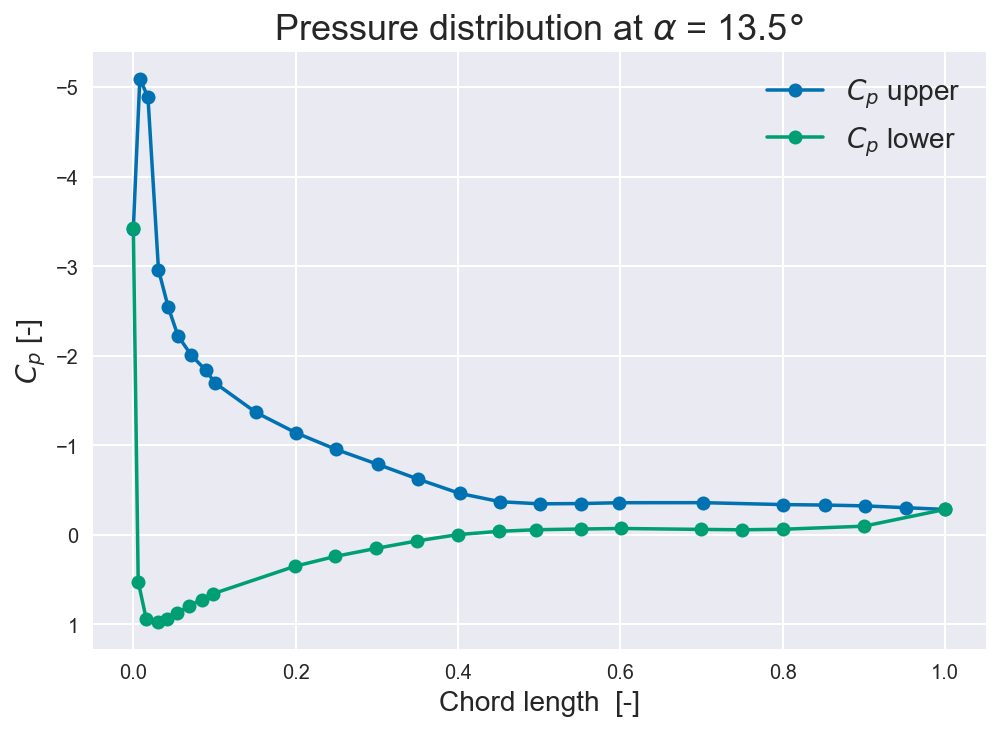

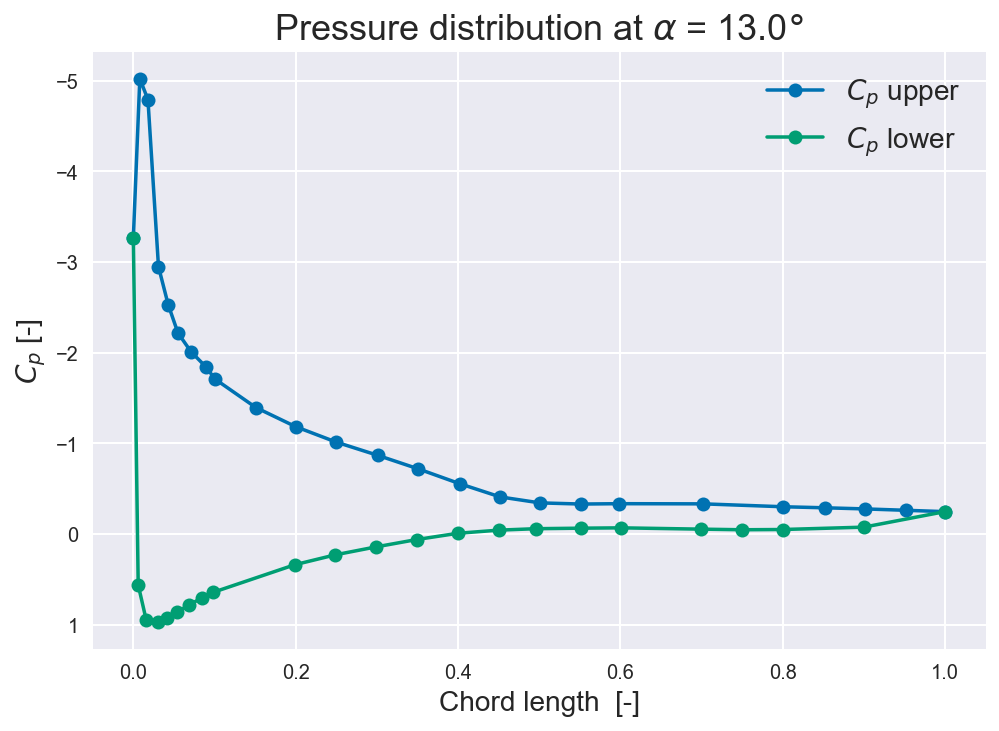

In [264]:


def GraphCP(AoA):
    plt.title(f'Pressure distribution at $α$ = {round(AoA,1)}$\degree$')
    dataPressure = data[1:].loc[round(data["Alpha"][1:].astype(float),1) == AoA ].copy()

    UpperChord = data[data["Alpha"] == "degrees"].iloc[0]['Cpu_001':'Cpu_025'].astype(float).values
    LowerChord= data[data["Alpha"] == "degrees"].iloc[0]['Cpl_001':'Cpl_023'].astype(float).values
    CpUpper = dataPressure.iloc[0]['Cpu_001':'Cpu_025'].astype(float)
    CpLower = dataPressure.iloc[0]['Cpl_001':'Cpl_023'].astype(float)
    plt.gca().invert_yaxis()
    plt.plot(UpperChord/100,CpUpper.values,  marker="o", label='$C_p$ upper')
    plt.plot(LowerChord/100,CpLower.values,  marker="o", label='$C_p$ lower')
    plt.legend()
    plt.xlabel("Chord length  [-]")
    plt.ylabel("$C_p$ [-]")
    plt.grid(True)
    name = str(round(AoA,1)).replace(".","_")
    plt.savefig(f"cpGraph_{name}.png",dpi=200 )
    plt.show()

for i in data["Alpha"][1:].astype(float).values:
    GraphCP(round(i,1))
    

# Uncorrected data

Data of the 2D experiment before the correction

In [48]:
dataUnc = pd.read_csv('2D_pressure/unc_test.txt', sep="\s+",usecols=range(66))
dataUnc

,Runnr,Alpha,Cn,Ct,Cm,Cd,Cl,Cl-press,Cd-press,Z-w.r.,...,Cpl_014,Cpl_015,Cpl_016,Cpl_017,Cpl_018,Cpl_019,Cpl_020,Cpl_021,Cpl_022,Cpl_023
0,/,degrees,/,/,/,/,/,/,/,mm,...,40.00000,45.00000,49.60000,55.10000,60.10000,69.90000,75.00000,80.00000,90.00000,100.00000
1,1,-3.000,-0.3047,-0.007475,0.0010,0.008480,-0.3046,-0.3050,0.002580,0.00,...,-0.63659,-0.59054,-0.54403,-0.43579,-0.35958,-0.20942,-0.14179,-0.09411,0.02927,0.16830
2,2,-2.000,-0.2058,0.001313,0.0016,0.008494,-0.2056,-0.2059,0.001246,0.00,...,-0.58559,-0.54120,-0.49093,-0.45152,-0.34189,-0.18742,-0.12582,-0.08501,0.03162,0.17063
3,3,-1.000,-0.1071,0.006869,0.0015,0.008737,-0.1070,-0.1071,0.000802,0.00,...,-0.53740,-0.49806,-0.44824,-0.40692,-0.35470,-0.17051,-0.11247,-0.07473,0.03571,0.17412
4,4,0.000,-0.0047,0.008686,0.0000,0.008686,-0.0047,-0.0047,0.000648,0.00,...,-0.48985,-0.45623,-0.40916,-0.36568,-0.33161,-0.14959,-0.09750,-0.06346,0.04051,0.17620
5,5,1.000,0.0972,0.006994,-0.0013,0.008689,0.0971,0.0972,0.001167,0.00,...,-0.44350,-0.41581,-0.37288,-0.32923,-0.29431,-0.13003,-0.08244,-0.05224,0.04482,0.17795
6,6,2.000,0.1956,0.001797,-0.0010,0.008622,0.1954,0.1956,0.002362,0.00,...,-0.39530,-0.37362,-0.33563,-0.29388,-0.25717,-0.12831,-0.06674,-0.03934,0.05035,0.18085
7,7,3.000,0.2941,-0.006782,-0.0003,0.008617,0.2940,0.2942,0.004397,0.00,...,-0.34759,-0.33178,-0.29904,-0.26047,-0.22382,-0.14396,-0.05165,-0.02670,0.05535,0.18303
8,8,3.500,0.3421,-0.012275,0.0000,0.008634,0.3422,0.3424,0.005493,0.00,...,-0.32470,-0.31172,-0.28158,-0.24496,-0.20901,-0.14036,-0.04658,-0.02066,0.05766,0.18357
9,9,4.000,0.3916,-0.018514,0.0002,0.008844,0.3919,0.3920,0.006800,0.00,...,-0.30154,-0.29123,-0.26373,-0.22915,-0.19432,-0.13232,-0.04652,-0.01461,0.05991,0.18367


## Cl cd

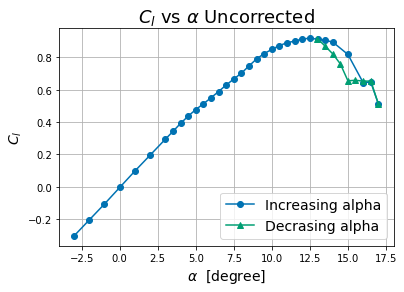

In [9]:
plt.title('$C_l$ vs $α$ Uncorrected')
plt.plot(dataUnc['Alpha'][1:34].to_numpy(dtype='float'),dataUnc['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Increasing alpha')
plt.plot(dataUnc['Alpha'][33:].to_numpy(dtype='float'),dataUnc['Cl'][33:].to_numpy(dtype='float'),  marker="^", label='Decrasing alpha')

plt.legend()
plt.xlabel("$α$  [degree]")
plt.ylabel("$C_l$")
plt.grid(True)
plt.show()

## $C_d$ vs $C_l$ graphs Uncorrected

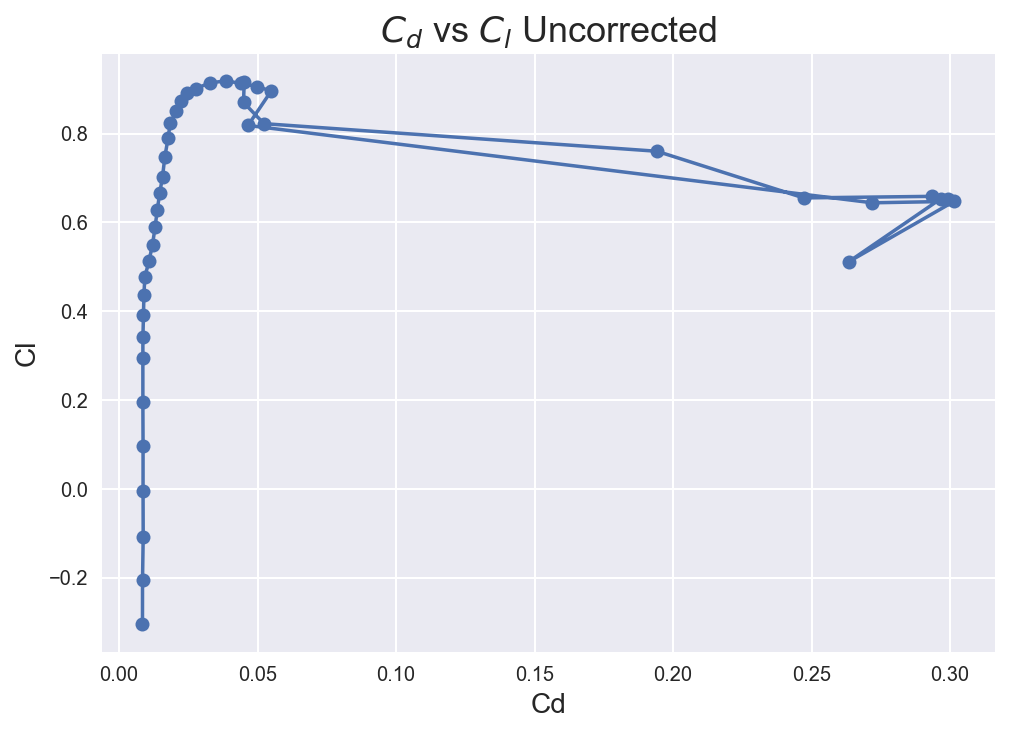

In [50]:
plt.title('$C_d$ vs $C_l$ Uncorrected')
plt.plot(dataUnc['Cd'][1:].to_numpy(dtype='float'),dataUnc['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.show()

# Comparison cor vs unc
Graphs comparing the corrected and uncorrected data

## Cl vs AoA

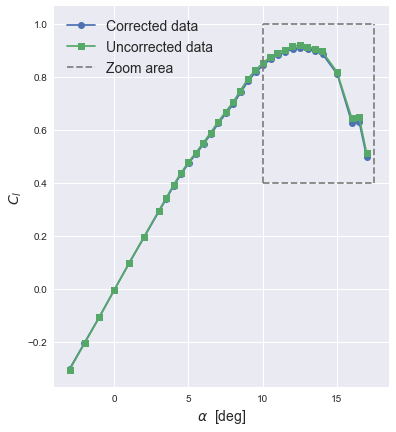

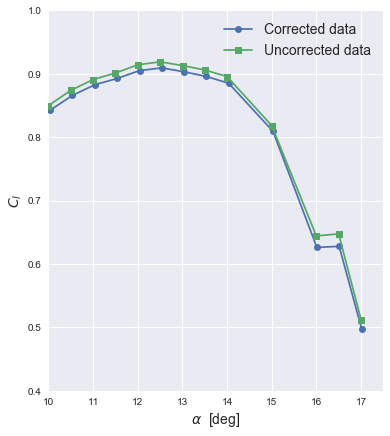

In [49]:
# plt.title('Comparison of Lift polar data')

plt.figure(figsize=(6,7))
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Corrected data')
# plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="o", label='Decrasing alpha corr.')

plt.plot(dataUnc['Alpha'][1:34].to_numpy(dtype='float'),dataUnc['Cl'][1:34].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
# plt.plot(dataUnc['Alpha'][33:].to_numpy(dtype='float'),dataUnc['Cl'][33:].to_numpy(dtype='float'),  marker="s", label='Decrasing alpha unc.')

squareColor = "grey"
plt.plot([10]*len(np.arange(0.4,1.1,0.1)),np.arange(0.4,1.1,0.1),"--",color= squareColor)
plt.plot([17.5]*len(np.arange(0.4,1.1,0.1)),np.arange(0.4,1.1,0.1),"--",color= squareColor)
plt.plot(np.arange(10,17.5,0.1),[0.4]*len(np.arange(10,17.5,0.1)),"--",color= squareColor)
plt.plot(np.arange(10,17.5,0.1),[1]*len(np.arange(10,17.5,0.1)),"--",color= squareColor, label="Zoom area")
plt.legend()

plt.xlabel("$α$  [deg]")
plt.ylabel("$C_l$")
plt.grid(True)
plt.savefig("comparisonClAlpha.png", dpi=250)
plt.show()

# plt.title('Comparison of Lift polar data [Zoom]')
plt.figure(figsize=(6,7))
plt.xlim(10,17.5)
plt.ylim(0.4,1)
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Corrected data')
# plt.plot(data['Alpha'][33:].to_numpy(dtype='float'),data['Cl'][33:].to_numpy(dtype='float'),  marker="o", label='Decrasing alpha corr.')

plt.plot(dataUnc['Alpha'][1:34].to_numpy(dtype='float'),dataUnc['Cl'][1:34].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
# plt.plot(dataUnc['Alpha'][33:].to_numpy(dtype='float'),dataUnc['Cl'][33:].to_numpy(dtype='float'),  marker="s", label='Decrasing alpha unc.')


plt.legend()
plt.xlabel("$α$  [deg]")
plt.ylabel("$C_l$")
plt.grid(True)
plt.savefig("comparisonClAlphaZoom.png", dpi=250)
plt.show()

## Drag polar comparison

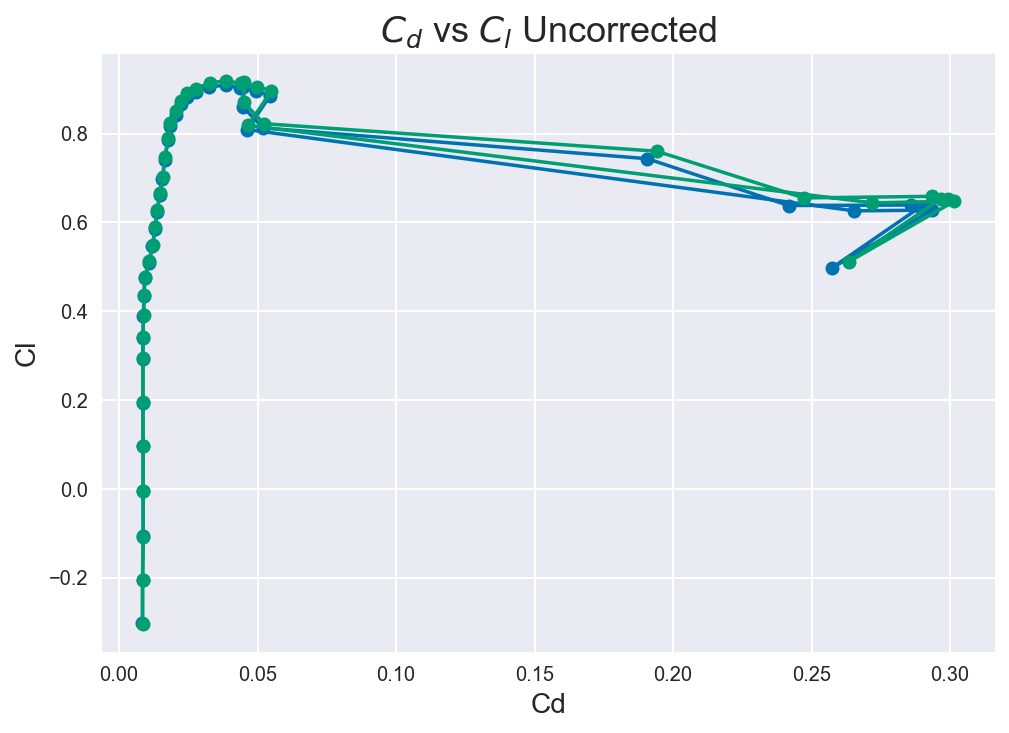

In [67]:
plt.title('$C_d$ vs $C_l$ Uncorrected')
plt.plot(data['Cd'][1:].to_numpy(dtype='float'),data['Cl'][1:].to_numpy(dtype='float'),  marker="o", label='Corrected data')
plt.plot(dataUnc['Cd'][1:].to_numpy(dtype='float'),dataUnc['Cl'][1:].to_numpy(dtype='float'),  marker="o")
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)

plt.show()

## Cd vs alpha

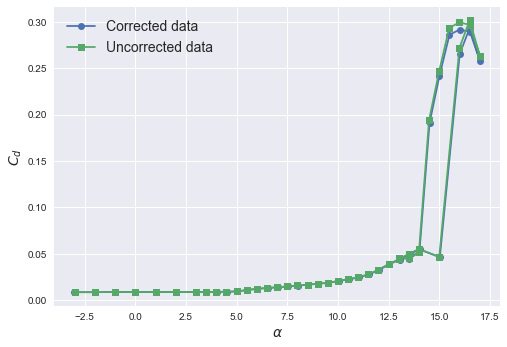

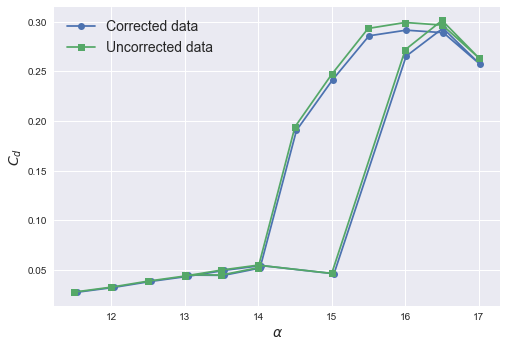

In [34]:
plt.plot(data['Alpha'][1:].to_numpy(dtype='float'),data['Cd'][1:].to_numpy(dtype='float'),  marker="o", label='Corrected data')
plt.plot(dataUnc['Alpha'][1:].to_numpy(dtype='float'),dataUnc['Cd'][1:].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
plt.xlabel("$α$")
plt.ylabel("$C_d$")
plt.grid(True)
plt.legend()
plt.show()


plt.plot(data['Alpha'][24:].to_numpy(dtype='float'),data['Cd'][24:].to_numpy(dtype='float'), marker="o", label='Corrected data')
plt.plot(dataUnc['Alpha'][24:].to_numpy(dtype='float'),dataUnc['Cd'][24:].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
plt.xlabel("$α$")
plt.ylabel("$C_d$")
plt.grid(True)
plt.legend()
plt.show()

## Cm

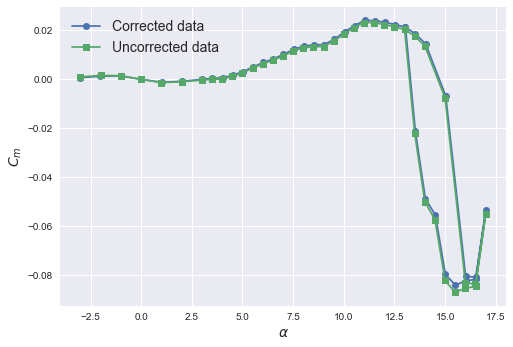

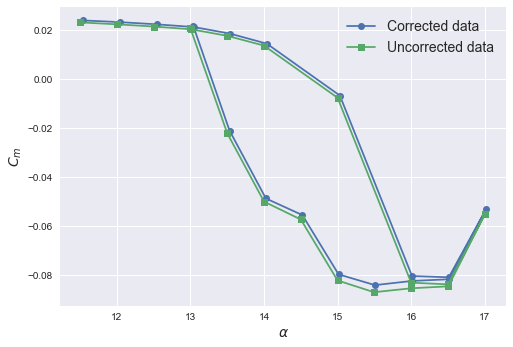

In [35]:
plt.plot(data['Alpha'][1:].to_numpy(dtype='float'),data['Cm'][1:].to_numpy(dtype='float'),  marker="o", label='Corrected data')
plt.plot(dataUnc['Alpha'][1:].to_numpy(dtype='float'),dataUnc['Cm'][1:].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
plt.xlabel("$α$")
plt.ylabel("$C_m$")
plt.grid(True)
plt.legend()
plt.show()


plt.plot(data['Alpha'][24:].to_numpy(dtype='float'),data['Cm'][24:].to_numpy(dtype='float'), marker="o", label='Corrected data')
plt.plot(dataUnc['Alpha'][24:].to_numpy(dtype='float'),dataUnc['Cm'][24:].to_numpy(dtype='float'),  marker="s", label='Uncorrected data')
plt.xlabel("$α$")
plt.ylabel("$C_m$")
plt.grid(True)
plt.legend()
plt.show()

# Comparison numerical and experiment

In [62]:
dataNumerical=pd.read_csv("2D_pressure\polar_Re0.700.txt", sep='\s+')
dataNumerical

,alpha,CL,CD,CDp,Cm,TopXtr,BotXtr,Cpmin,Chinge,XCp
0,-------,--------,---------,---------,--------,-------,-------,--------,---------,---------
1,-2.000,-0.2292,0.00708,0.00201,0.0007,0.7186,0.6149,-0.6145,0.0000,0.2473
2,-1.000,-0.1150,0.00696,0.00188,0.0004,0.6912,0.6426,-0.5166,0.0000,0.2485
3,0.000,0.0001,0.00693,0.00183,-0.0000,0.6661,0.6659,-0.4590,0.0000,0.5869
4,1.000,0.1150,0.00696,0.00188,-0.0005,0.6426,0.6913,-0.5166,0.0000,0.2486
5,2.000,0.2294,0.00703,0.00201,-0.0007,0.6153,0.7186,-0.6149,0.0000,0.2475
6,3.000,0.3417,0.00714,0.00214,-0.0004,0.5700,0.7473,-0.9477,0.0000,0.2453
7,4.000,0.4528,0.00732,0.00242,0.0001,0.5184,0.7780,-1.4794,0.0000,0.2433
8,5.000,0.5454,0.00894,0.00326,0.0033,0.2799,0.8140,-2.0257,0.0000,0.2366
9,6.000,0.6289,0.01140,0.00490,0.0076,0.0735,0.8584,-2.5840,0.0000,0.2299


## Cl vs alpha

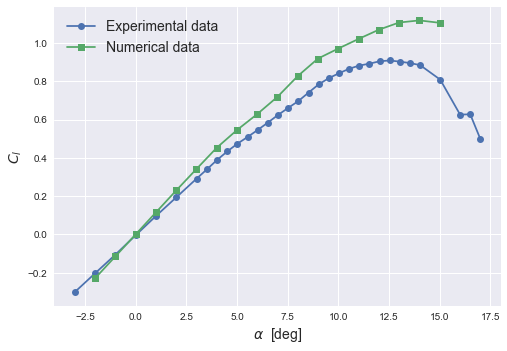

In [63]:
# plt.figure(figsize=(6,7))
plt.plot(data['Alpha'][1:34].to_numpy(dtype='float'),data['Cl'][1:34].to_numpy(dtype='float'),  marker="o", label='Experimental data')

plt.plot(dataNumerical['alpha'][1:].to_numpy(dtype='float'),dataNumerical['CL'][1:].to_numpy(dtype='float'),  marker="s", label='Numerical data')

plt.legend()

plt.xlabel("$α$  [deg]")
plt.ylabel("$C_l$")
plt.grid(True)
# plt.savefig("comparisonClAlpha.png", dpi=250)
plt.show()

## Cd Cl

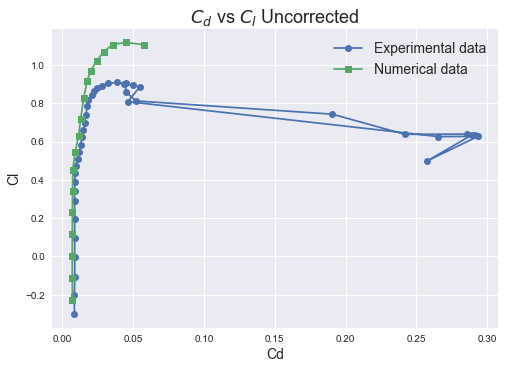

In [64]:
plt.title('$C_d$ vs $C_l$ Uncorrected')
plt.plot(data['Cd'][1:].to_numpy(dtype='float'),data['Cl'][1:].to_numpy(dtype='float'),  marker="o", label='Experimental data')
plt.plot(dataNumerical['CD'][1:].to_numpy(dtype='float'),dataNumerical['CL'][1:].to_numpy(dtype='float'),  marker="s", label='Numerical data')
plt.xlabel("Cd")
plt.ylabel("Cl")
plt.grid(True)
plt.legend()
plt.show()

## Cd alpha

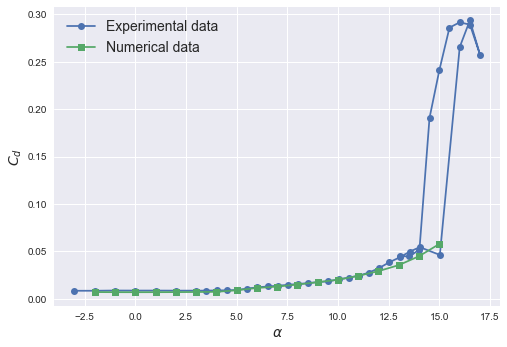

In [65]:
plt.plot(data['Alpha'][1:].to_numpy(dtype='float'),data['Cd'][1:].to_numpy(dtype='float'),  marker="o", label='Experimental data')
plt.plot(dataNumerical['alpha'][1:].to_numpy(dtype='float'),dataNumerical['CD'][1:].to_numpy(dtype='float'),  marker="s", label='Numerical data')
plt.xlabel("$α$")
plt.ylabel("$C_d$")
plt.grid(True)
plt.legend()
plt.show()

## Cm

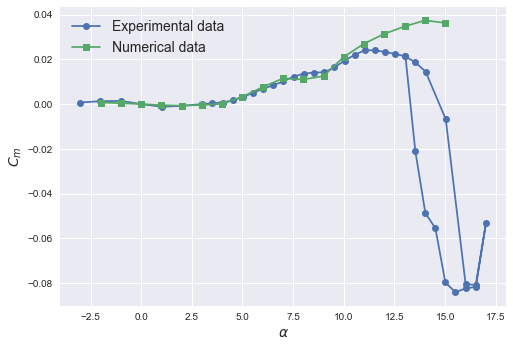

In [66]:
plt.plot(data['Alpha'][1:].to_numpy(dtype='float'),data['Cm'][1:].to_numpy(dtype='float'),  marker="o", label='Experimental data')
plt.plot(dataNumerical['alpha'][1:].to_numpy(dtype='float'),dataNumerical['Cm'][1:].to_numpy(dtype='float'),  marker="s", label='Numerical data')
plt.xlabel("$α$")
plt.ylabel("$C_m$")
plt.grid(True)
plt.legend()
plt.show()